# Linear Regression to Predict Student Performance

<div class="alert alert-block alert-info">

authors, group info, project info

</dic>

Our selected dataset is [Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors).

All of the scripts and data for this project can be found on our [Git Repository](https://github.com/cztm/linear-regression).

In [283]:
import matplotlib.pyplot as plt 
from matplotlib import gridspec
import seaborn as sns

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from plotnine import *
import scipy.stats as stats
from statsmodels.stats.outliers_influence import OLSInfluence
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from itertools import combinations
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [100]:
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'  
rcParams['font.sans-serif'] = ['Arial']

# Student Performance Factors Dataset Overview

The "Student Performance Factors" dataset contains 19 variables that may influence students' exam scores. It is designed to help researchers analyze the potential impact of these factors on student performance. The dataset includes information such as study time (`Hours_Studied`), attendance (`Attendance`), parental involvement (`Parental_Involvement`), access to resources (`Access_to_Resources`), and participation in extracurricular activities (`Extracurricular_Activities`). Additionally, it covers socioeconomic and background data such as family income (`Family_Income`), motivation level (`Motivation_Level`), tutoring sessions (`Tutoring_Sessions`), school type (`School_Type`), sleep hours (`Sleep_Hours`), and parental education level (`Parental_Education_Level`).

## Purpose and Applications

Researchers can use this dataset to build regression models for predicting exam scores (`Exam_Score`) and to identify significant factors affecting student academic performance. The dataset's potential applications include:

- Supporting educational decision-making
- Assisting in policy formulation
- Optimizing the allocation of educational resources

Ultimately, the goal is to better understand and improve the key factors influencing student success, thereby enabling educators and policymakers to provide more targeted support.

## Variable Descriptions

1. **Hours_Studied**: Daily study hours.  
2. **Attendance**: Attendance rate (percentage).  
3. **Parental_Involvement**: Parent involvement (Low, Medium, High).  
4. **Access_to_Resources**: Resource accessibility (Low, Medium, High).  
5. **Extracurricular_Activities**: Participation in extracurricular activities.  
6. **Sleep_Hours**: Daily sleep hours.  
7. **Previous_Scores**: Prior exam scores.  
8. **Motivation_Level**: Motivation level (Low, Medium, High).  
9. **Internet_Access**: Internet access.  
10. **Tutoring_Sessions**: Number of tutoring sessions.  
11. **Family_Income**: Family income level (Low, Medium, High).  
12. **Teacher_Quality**: Teacher quality (Low, Medium, High).  
13. **School_Type**: School type (Public or Private).  
14. **Peer_Influence**: Peer influence (Positive, Neutral, Negative).  
15. **Physical_Activity**: Weekly physical activity hours.  
16. **Learning_Disabilities**: Presence of learning disabilities.  
17. **Parental_Education_Level**: Parents' education level (High School, College, Postgraduate).  
18. **Distance_from_Home**: Distance from home to school (Near, Moderate, Far).  
19. **Gender**: Student gender (Male or Female).  
20. **Exam_Score**: Academic performance indicator (exam score).

## Research Questions

1. **Which factors are the most significant predictors of students' exam scores?**
2. **How do parental involvement, access to resources, and socioeconomic factors impact student performance?**
3. **What is the combined effect of study habits, peer influence, and tutoring sessions on exam outcomes?**
4. **Does school type or teacher quality significantly influence exam scores?**

## Methods Used in the Analysis
   
1. **Exploratory Data Analysis**: Initial analysis includes correlation calculations to understand the relationships between predictors and exam scores.

2. **Multiple Linear Regression**: Regression models are built using significant predictors such as attendance, hours studied, and previous scores. The model is validated using metrics like adjusted R-squared, p-values, and F-statistics.

3. **ANOVA (Types I, II, and III)**: Variance analysis is conducted to understand the contribution of each predictor to the total variance in exam scores.

4. **Model Evaluation**: The model’s prediction capability is visualized through plots of actual vs. predicted exam scores, residuals distribution, and summary statistics.


In [101]:
students = pd.read_csv("Data/StudentPerformanceFactors.csv")

## EDA

### First sniff of the data

In [102]:
print(f"Our dataset has {students.shape[1]} variables and {students.shape[0]} records")

Our dataset has 20 variables and 6607 records


In [103]:
students.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

In [104]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

### Variable types

In [105]:
object_cols = []
numeric_cols = []
for colname in students.columns:
    type = students[colname].dtype
    if type == "int64":
        numeric_cols.append(colname)
    elif type == "object":
        object_cols.append(colname)

In [106]:
print(f"Object columns: {object_cols}")
print(f"Numeric columns: {numeric_cols}")

Object columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numeric columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


In [107]:
unique_values = students.nunique()
unique_values

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

Let's check that all of our object variables can be turned into categorical:

In [108]:
students[object_cols].nunique()

Parental_Involvement          3
Access_to_Resources           3
Extracurricular_Activities    2
Motivation_Level              3
Internet_Access               2
Family_Income                 3
Teacher_Quality               3
School_Type                   2
Peer_Influence                3
Learning_Disabilities         2
Parental_Education_Level      3
Distance_from_Home            3
Gender                        2
dtype: int64

Since all of them are not actually continuous or discrete values with a lot of unique values, let's go ahead and turn them info categorical variables.

In [109]:
students[object_cols] = students[object_cols].astype('category')

Let's check our resulting column types and redefine our lists.

In [110]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [111]:
categorical_variables = []
numerical_variables = []
for colname in students.columns:
    type = students[colname].dtype
    if type == "int64":
        numerical_variables.append(colname)
    elif type == "category":
        categorical_variables.append(colname)

In [112]:
print(f"Categorical variables: {categorical_variables}")
print(f"Numerical variables: {numerical_variables}")

Categorical variables: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numerical variables: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


### Missing values
Let's take a closer look at the missing values in our dataset.

In [113]:
students.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Let's check the actual frequency of our missing values based on the total amount of records we have.

In [114]:
students.isnull().sum()/len(students)*100

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

The percentage of missing values we have is very very low, and since we have a considerable number of records as it is, we've decided to **drop the records with missing data**

In [115]:
students_adjusted = students.dropna()
students_adjusted.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [116]:
print(f"The original dataset, students, has {students.shape[1]} variables and {students.shape[0]} records")
print(f"We had a total of {students.shape[0]-students_adjusted.shape[0]} records with missing data.")
print(f"Our resulting dataset, adjusted_students, has {students_adjusted.shape[1]} variables and {students_adjusted.shape[0]} records")

The original dataset, students, has 20 variables and 6607 records
We had a total of 229 records with missing data.
Our resulting dataset, adjusted_students, has 20 variables and 6378 records


### First visualizations

We want to visualize our variables, and therefore will use a number of different plots. We will approach numerical and categorical variables differently.

In [117]:
print(f"Categorical variables: {categorical_variables}")
print(f"Numerical variables: {numerical_variables}")

Categorical variables: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Numerical variables: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']


#### Categorical variables

##### Confusion tables

In [118]:
parent_invol_resource_access_crossed = pd.crosstab(students['Parental_Involvement'],students['Access_to_Resources'])
print(parent_invol_resource_access_crossed)

Access_to_Resources   High  Low  Medium
Parental_Involvement                   
High                   568  413     927
Low                    414  231     692
Medium                 993  669    1700


In [119]:
peer_influence_income_crossed = pd.crosstab(students['Peer_Influence'],students['Family_Income'])
print(peer_influence_income_crossed)

Family_Income   High   Low  Medium
Peer_Influence                    
Negative         251   577     549
Neutral          493  1038    1061
Positive         525  1057    1056


In [120]:
distance_motivation_crossed = pd.crosstab(students['Distance_from_Home'], students['Motivation_Level'])
print(distance_motivation_crossed)

Motivation_Level    High   Low  Medium
Distance_from_Home                    
Far                  142   185     331
Moderate             394   611     993
Near                 773  1125    1986


In [289]:
students = students_adjusted.drop(columns=['Distance_from_Home', 'Peer_Influence', 'Parental_Involvement'])

In [290]:
students.sample(5)

Hours_Studied  Attendance Access_to_Resources  \
2757             15          74                High   
5217             17          87              Medium   
5172             18          84                 Low   
2052             16          94                High   
1685             27          71                 Low   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
2757                         No           10               99   
5217                        Yes            7               61   
5172                         No            6               64   
2052                        Yes            8               94   
1685                         No            8               69   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
2757              Low              No                  0           Low   
5217           Medium             Yes                  4          High   
5172           Medium             Yes                  2           Low   
2052             High             Yes                  2           Low   
1685           Medium             Yes                  1          High   

     Teacher_Quality School_Type  Physical_Activity Learning_Disabilities  \
2757          Medium     Private                  3                    No   
5217          Medium      Public                  3                   Yes   
5172            High      Public                  2                    No   
2052            High     Private                  3                    No   
1685          Medium      Public                  4                    No   

     Parental_Education_Level  Gender  Exam_Score  
2757                  College    Male          63  
5217              High School  Female          67  
5172              High School  Female          67  
2052              High School    Male          71  
1685                  College    Male          67

Since students who have medium/high parental involvement also have medium/high access to resources, both categories aren't necessary for the model and since access to resources matters more for our model, we have dropped parental involvement. Similarly, medium/high family income students have neutral/positive peer relationships and those with medium/high motivation levels live moderate/near school. Since there are associations between those two groups, we've chosen to kep family income and motivation levels as they variables that we're interested in. 

# Spliting the Data for 2 Models

## Set up

In [403]:
high_scores = students[students['Exam_Score'] >= 80].reset_index()
low_scores = students[students['Exam_Score'] < 80].reset_index()
print(len(high_scores))
print(len(low_scores))

48
6330


In [404]:
train_high, test_high = train_test_split(high_scores, test_size=0.2, random_state=42)
train_low, test_low = train_test_split(low_scores, test_size=0.2, random_state=42)
print(len(train_low))
print(len(train_high))

5064
38


In [405]:
X_train_high = train_high.drop('Exam_Score', axis= 1)
y_train_high = train_high['Exam_Score']

X_test_high = test_high.drop('Exam_Score', axis= 1)
y_test_high = test_high['Exam_Score']

X_train_low = train_low.drop('Exam_Score', axis= 1)
y_train_low = train_low['Exam_Score']

X_test_low = test_low.drop('Exam_Score', axis= 1)
y_test_low = test_low['Exam_Score']

In [406]:
categorical_cols1 = X_train_high.select_dtypes(include=['object', 'category']).columns
numerical_cols1 = X_train_high.select_dtypes(include=['int64', 'float64']).columns

categorical_cols2 = X_test_high.select_dtypes(include=['object', 'category']).columns
numerical_cols2 = X_test_high.select_dtypes(include=['int64', 'float64']).columns

categorical_cols3 = X_train_low.select_dtypes(include=['object', 'category']).columns
numerical_cols3 = X_train_low.select_dtypes(include=['int64', 'float64']).columns

categorical_cols4 = X_test_low.select_dtypes(include=['object', 'category']).columns
numerical_cols4 = X_test_low.select_dtypes(include=['int64', 'float64']).columns

In [407]:
preprocessor_train_high = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols1),
        ('cat', OneHotEncoder(drop='first'), categorical_cols1)  # drop='first' avoids dummy variable trap
    ]
)

preprocessor_test_high = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols2),
        ('cat', OneHotEncoder(drop='first'), categorical_cols2)  # drop='first' avoids dummy variable trap
    ]
)
preprocessor_train_low = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols3),
        ('cat', OneHotEncoder(drop='first'), categorical_cols3)  # drop='first' avoids dummy variable trap
    ]
)

preprocessor_test_low = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols4),
        ('cat', OneHotEncoder(drop='first'), categorical_cols4)  # drop='first' avoids dummy variable trap
    ]
)

## Low Model

In [408]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_train_high),
    ('lasso', Lasso(alpha=0.1))  # You can adjust alpha for regularization
])

# Fit the model to the entire dataset
lasso_pipeline.fit(X_train_high, y_train_high)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['index', 'Hours_Studied', 'Attendance', 'Sleep_Hours',
       'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Learning_Disabilities', 'Parental_Education_Level', 'Gender'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=0.1))])

In [409]:
# Get feature names after one-hot encoding
encoded_categorical_names = lasso_pipeline.named_steps['preprocessor'] \
    .transformers_[1][1].get_feature_names_out(categorical_cols1)

# Combine numerical and encoded categorical column names
all_feature_names = list(numerical_cols1) + list(encoded_categorical_names)

# Get the coefficients of the Lasso model
lasso_coefficients = lasso_pipeline.named_steps['lasso'].coef_

# Select features with non-zero coefficients
selected_features = [name for name, coef in zip(all_feature_names, lasso_coefficients) if coef != 0]

print(f'Selected predictors: {selected_features}')

Selected predictors: ['index', 'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Internet_Access_Yes', 'Family_Income_Low', 'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium', 'School_Type_Public', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate', 'Gender_Male']


In [410]:
x_lasso_train_low = X_train_low.drop(columns=['Sleep_Hours', 
                      'Internet_Access', 
                      'Teacher_Quality', 'School_Type', 'Learning_Disabilities', 
                       'Gender', 'index'])
y_lasso_train = y_train_low
formula = 'Exam_Score ~ ' + ' + '.join(x_lasso_train_low.columns)

In [411]:
lasso_model_low = smf.ols(formula= formula, data = train_low).fit()
lasso_model_low.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     3183.
Date:                Thu, 03 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:22:48   Log-Likelihood:                -7540.9
No. Observations:                5064   AIC:                         1.511e+04
Df Residuals:                    5049   BIC:                         1.521e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   42.0979      0.158    266.026      0.000      41.788      42.408
Access_to_Resources[T.Low]                  -1.9372      0.044    -44.274      0.000      -2.023      -1.851
Access_to_Resources[T.Medium]               -0.9681      0.035    -27.774      0.000      -1.036      -0.900
Extracurricular_Activities[T.Yes]            0.4688      0.031     15.212      0.000       0.408       0.529
Motivation_Level[T.Low]                     -0.9550      0.044    -21.845      0.000      -1.041      -0.869
Motivation_Level[T.Medium]                  -0.4403      0.040    -11.040      0.000      -0.519      -0.362
Family_Income[T.Low]                        -1.0166      0.042    -24.447      0.000      -1.098      -0.935
Family_Income[T.Medium]                     -0.4775      0.042    -11.470      0.000      -0.559      -0.396
Parental_Education_Level[T.High School]     -0.4723      0.035    -13.593      0.000      -0.540      -0.404
Parental_Education_Level[T.Postgraduate]     0.5296      0.043     12.201      0.000       0.444       0.615
Hours_Studied                                0.2976      0.003    117.166      0.000       0.293       0.303
Attendance                                   0.1991      0.001    152.018      0.000       0.196       0.202
Previous_Scores                              0.0470      0.001     44.784      0.000       0.045       0.049
Tutoring_Sessions                            0.4998      0.012     40.552      0.000       0.476       0.524
Physical_Activity                            0.2205      0.015     14.948      0.000       0.192       0.249
==============================================================================
Omnibus:                      872.171   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13229.088
Skew:                           0.352   Prob(JB):                         0.00
Kurtosis:                      10.887   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [300]:
# ! pip install scikit-misc


/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/3383819614.py:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


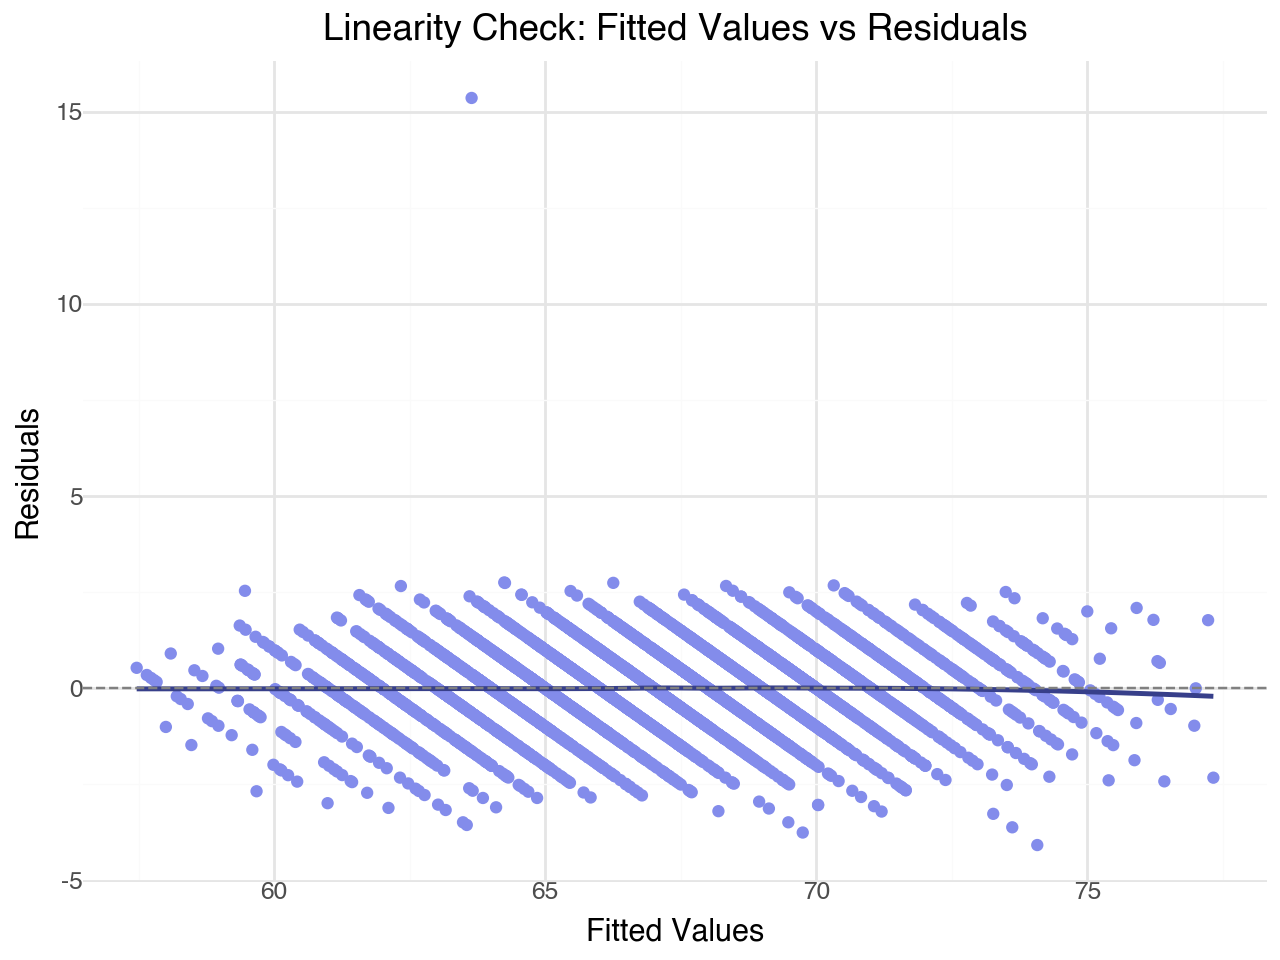

In [412]:
data = pd.DataFrame({
    'Fitted_Values': lasso_model_low.fittedvalues,
    'Residuals': lasso_model_low.resid
})

# Create the residual plot using plotnine
residual_plot = (
    ggplot(data, aes(x='Fitted_Values', y='Residuals')) +
    geom_point(color = "#838ceb") +  # Scatter plot of points
    geom_smooth(method='loess', color='#373f8a', se=False, linetype='solid') +  # LOWESS line
    geom_hline(yintercept=0, linetype='dashed', color='gray') +  # Horizontal line at y=0
    labs(x='Fitted Values', y='Residuals', title='Linearity Check: Fitted Values vs Residuals') +
    theme_minimal()  # Set the figure size
)

# Show the plot
print(residual_plot)


/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/4092358956.py:23: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


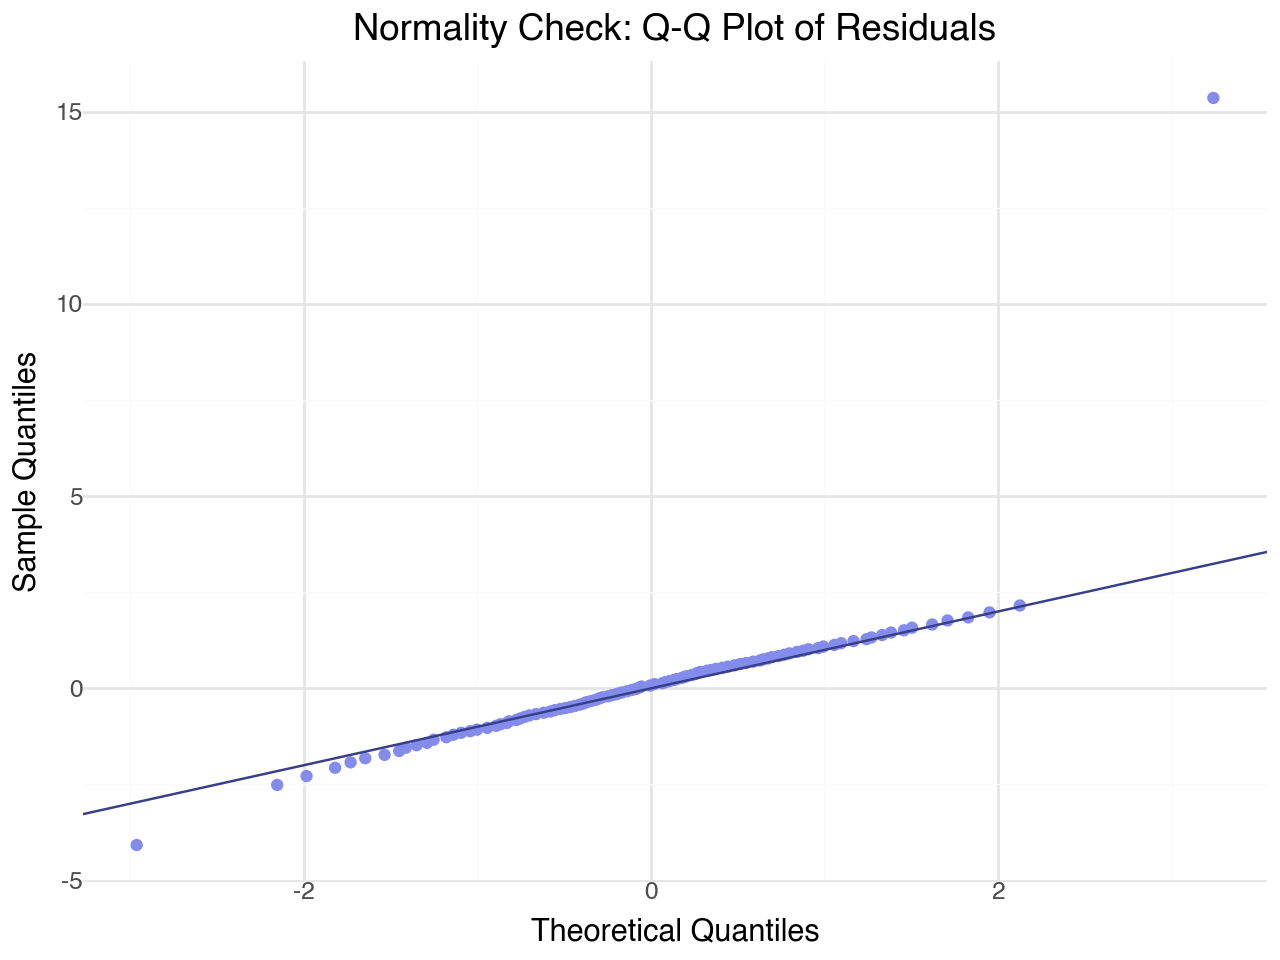

In [413]:
# Get the residuals from your model
low_residuals = lasso_model_low.resid

# Compute the quantiles
quantiles = np.percentile(low_residuals, [i for i in range(0, 101)])
theoretical_quantiles = np.percentile(np.random.normal(0, 1, 1000), [i for i in range(0, 101)])

# Create a DataFrame for the plot
qq_data = pd.DataFrame({
    'Theoretical Quantiles': theoretical_quantiles,
    'Sample Quantiles': quantiles
})

# Create the Q-Q plot
gg = (ggplot(qq_data, aes(x='Theoretical Quantiles', y='Sample Quantiles')) +
      geom_point(color = "#838ceb") +
      geom_abline(slope=1, intercept=0, color='#373f8a') +
      labs(title='Normality Check: Q-Q Plot of Residuals',
           x='Theoretical Quantiles',
           y='Sample Quantiles') +
      theme_minimal())
      
print(gg)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 15 x 6 in image.
/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: scatter_plots.png
/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/themes/themeable.py:2419: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.
/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/4059266896.py:19: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/themes/themeable.py:2419: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This par

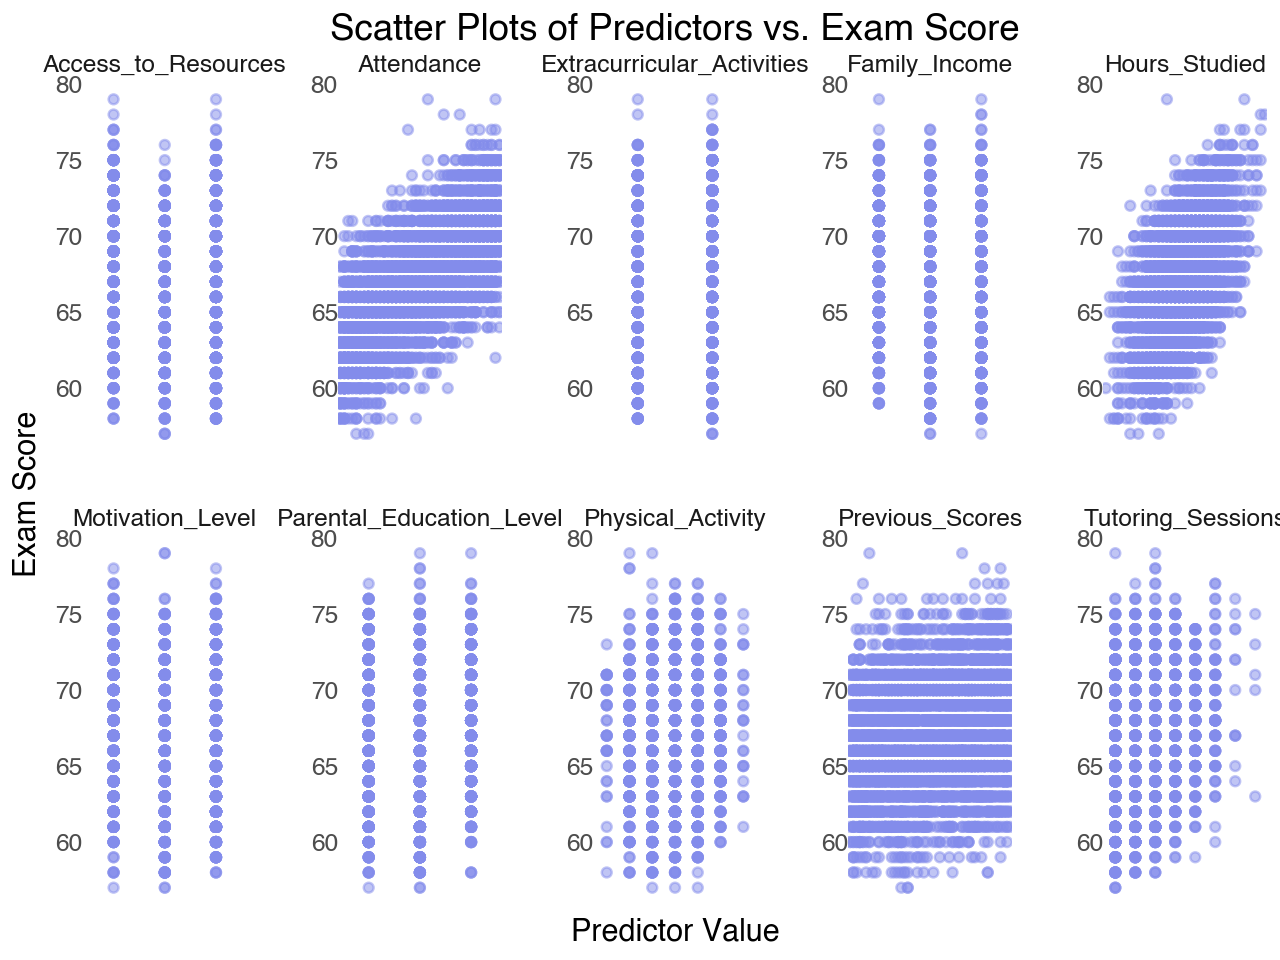

In [414]:
train_long = train_low.melt(id_vars='Exam_Score', value_vars=x_lasso_train_low.columns,
                             var_name='Predictor', value_name='Value')
gg = (ggplot(train_long, aes(x='Value', y='Exam_Score')) +
      geom_point(alpha=0.5, color = "#838ceb") +
      facet_wrap('~Predictor', scales='free', ncol=5) +  # Facet by Predictor with 5 columns
      labs(title='Scatter Plots of Predictors vs. Exam Score',
           x='Predictor Value',  # Keep x-axis label
           y='Exam Score') +  # Keep y-axis label
      theme_minimal() +
      theme(subplots_adjust={'top': 0.9},  # Adjust layout for title
            axis_text_x=element_blank(),  # Remove tick labels on the x-axis
            panel_spacing=0.05,  # Increase spacing between panels
            panel_grid_major=element_blank(),  # Remove major grid lines
            panel_grid_minor=element_blank()   # Remove minor grid lines
      )
)
gg.save('scatter_plots.png', width=15, height=6)  # Adjust width as needed

print(gg)




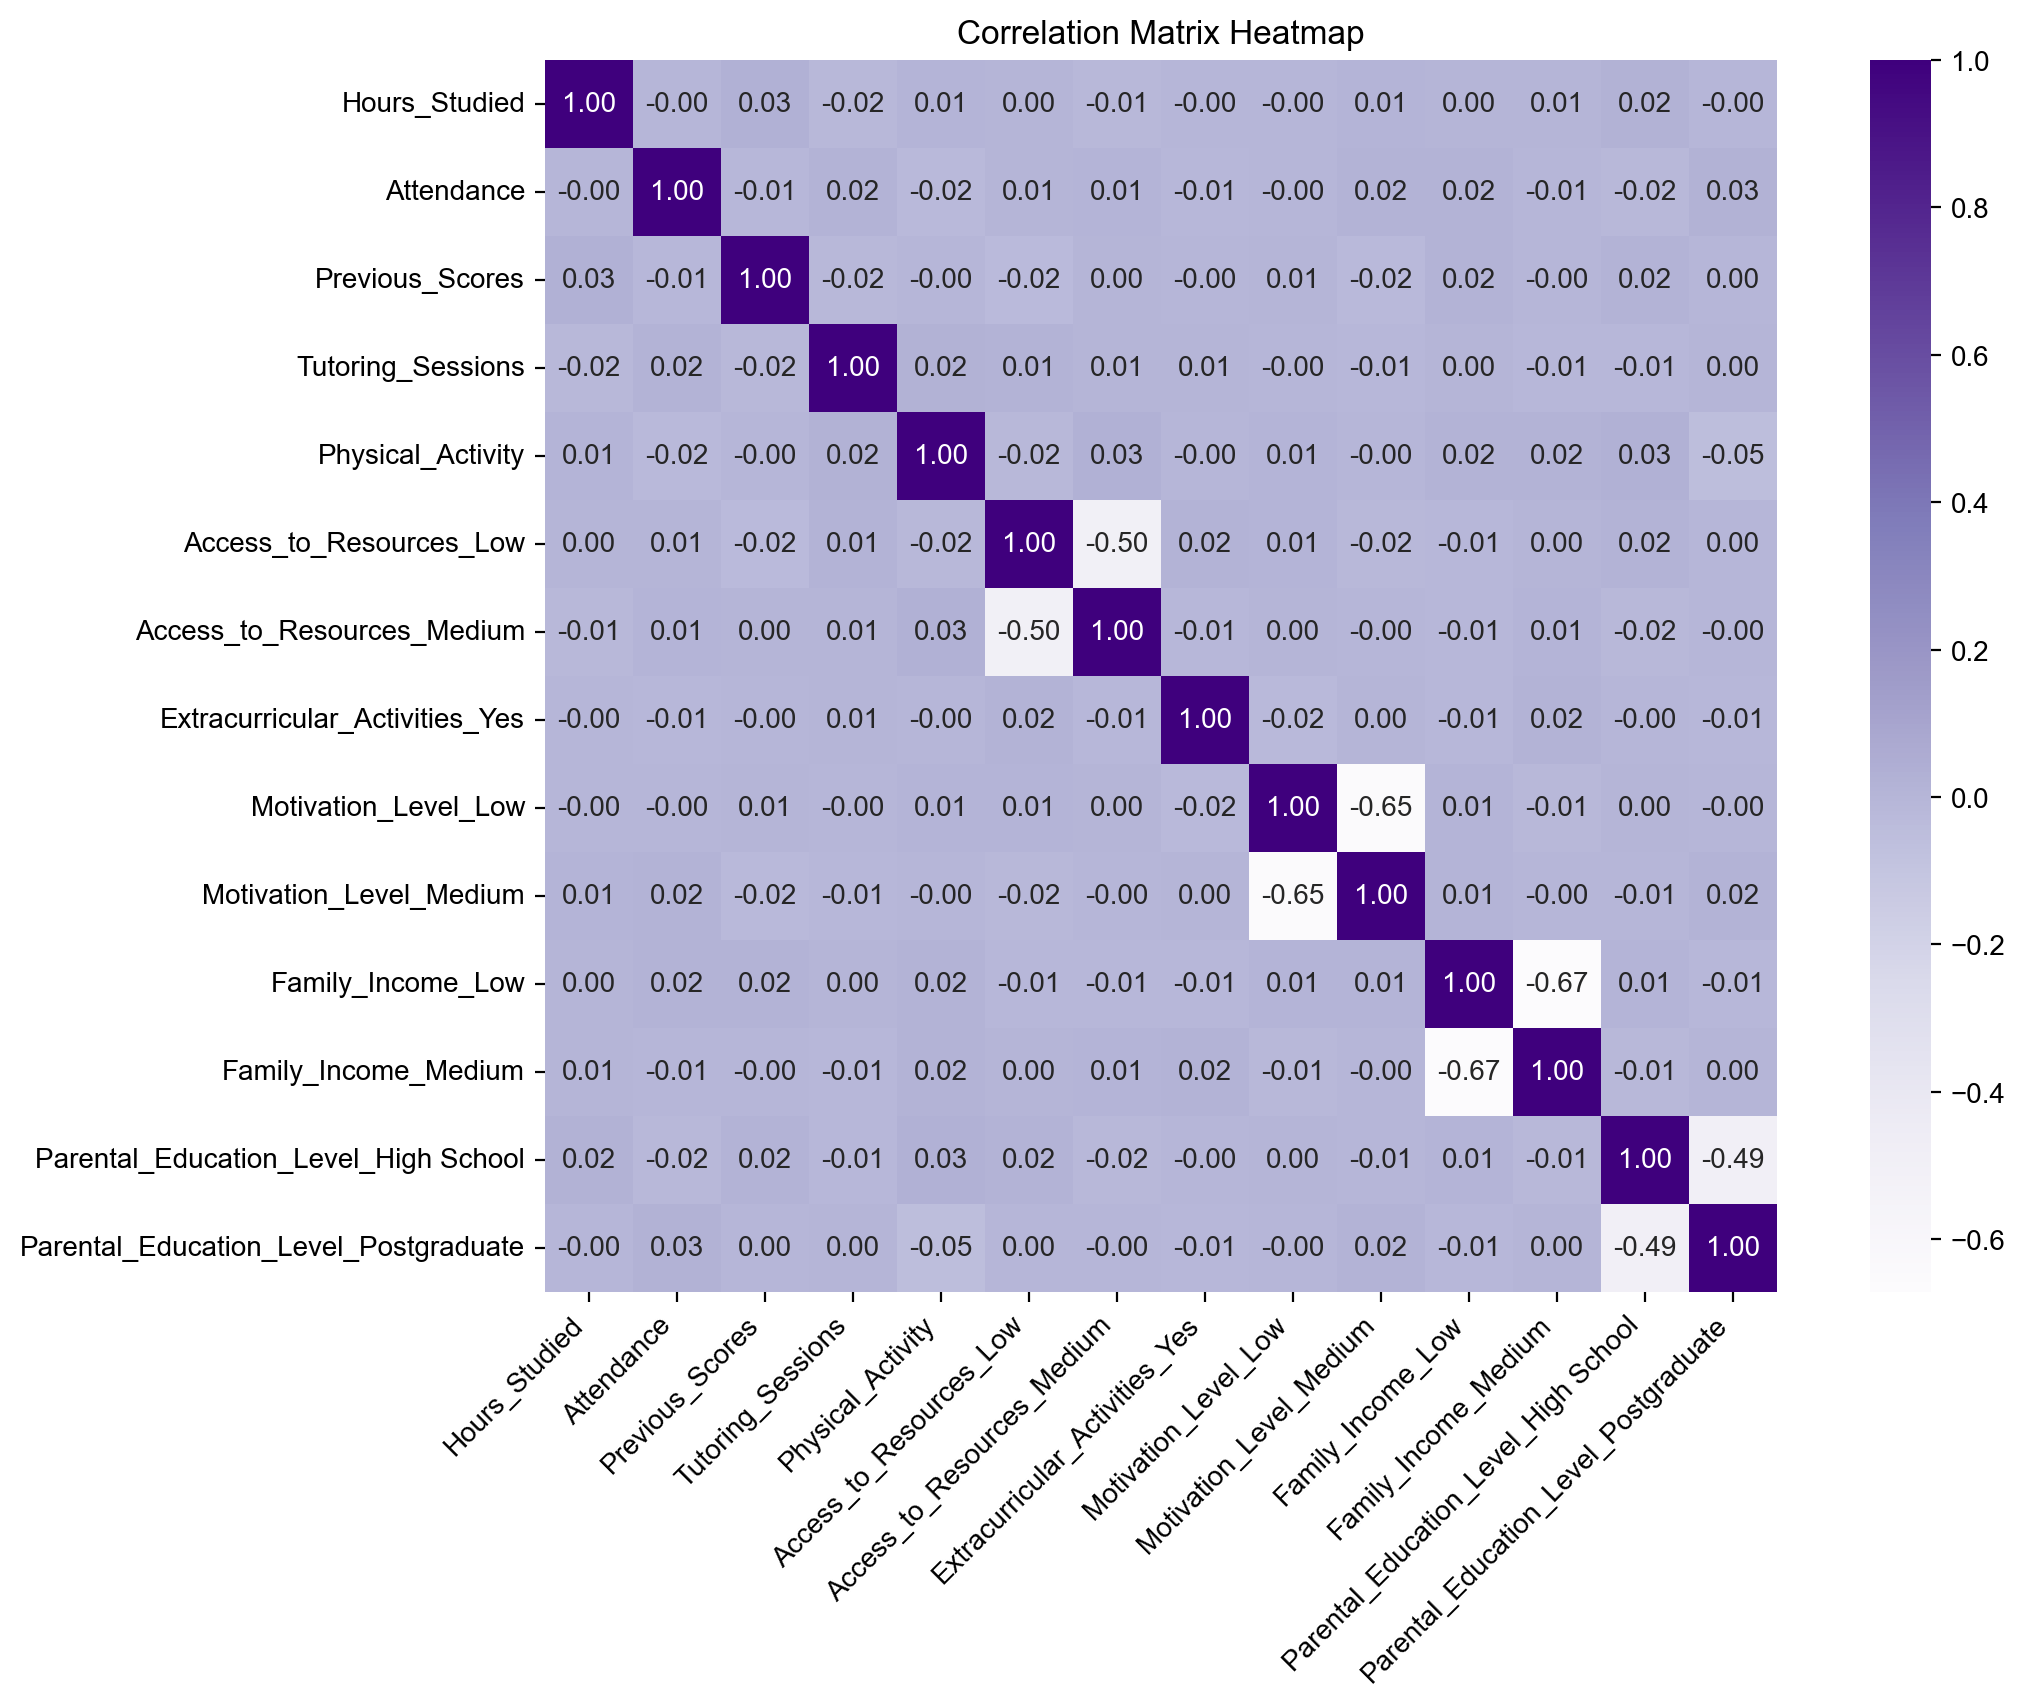

In [415]:
# Encode the categorical variables
X_encoded = pd.get_dummies(x_lasso_train_low, drop_first=True)

# Compute the correlation matrix
correlation_matrix = X_encoded.corr()

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Purples', square=True, cbar=True)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Rotate x-tick labels to be diagonal
plt.xticks(rotation=45, ha='right')

# Show the heatmap
plt.show()


## Looking at Outliers in low model

In [428]:

# Calculate influence measures
influence = OLSInfluence(lasso_model_low)

# Extract leverage, Cook's distance, and studentized residuals
leverage = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance[0]
studentized_residuals = influence.resid_studentized_internal

# Create a DataFrame to hold the values
influence_data = pd.DataFrame({
    'Index': np.arange(len(train_low)),
    'Leverage': leverage,
    'Cook\'s Distance': cooks_distance,
    'Studentized Residual': studentized_residuals
})

# Sort by Leverage, Cook's Distance, and Studentized Residual (you can prioritize as needed)
influence_data_sorted = influence_data.sort_values(by=['Leverage', 'Cook\'s Distance', 'Studentized Residual'], ascending=False)

# Select the top 3 points
top_3_influence = influence_data_sorted.head(3)

# Display the top 3 influential points
top_3_influence

Index  Leverage  Cook's Distance  Studentized Residual
5611   5043  0.007464     5.039074e-07             -0.031705
3731     53  0.006856     4.598461e-04             -0.999592
3717   1002  0.006809     5.532396e-04              1.100212

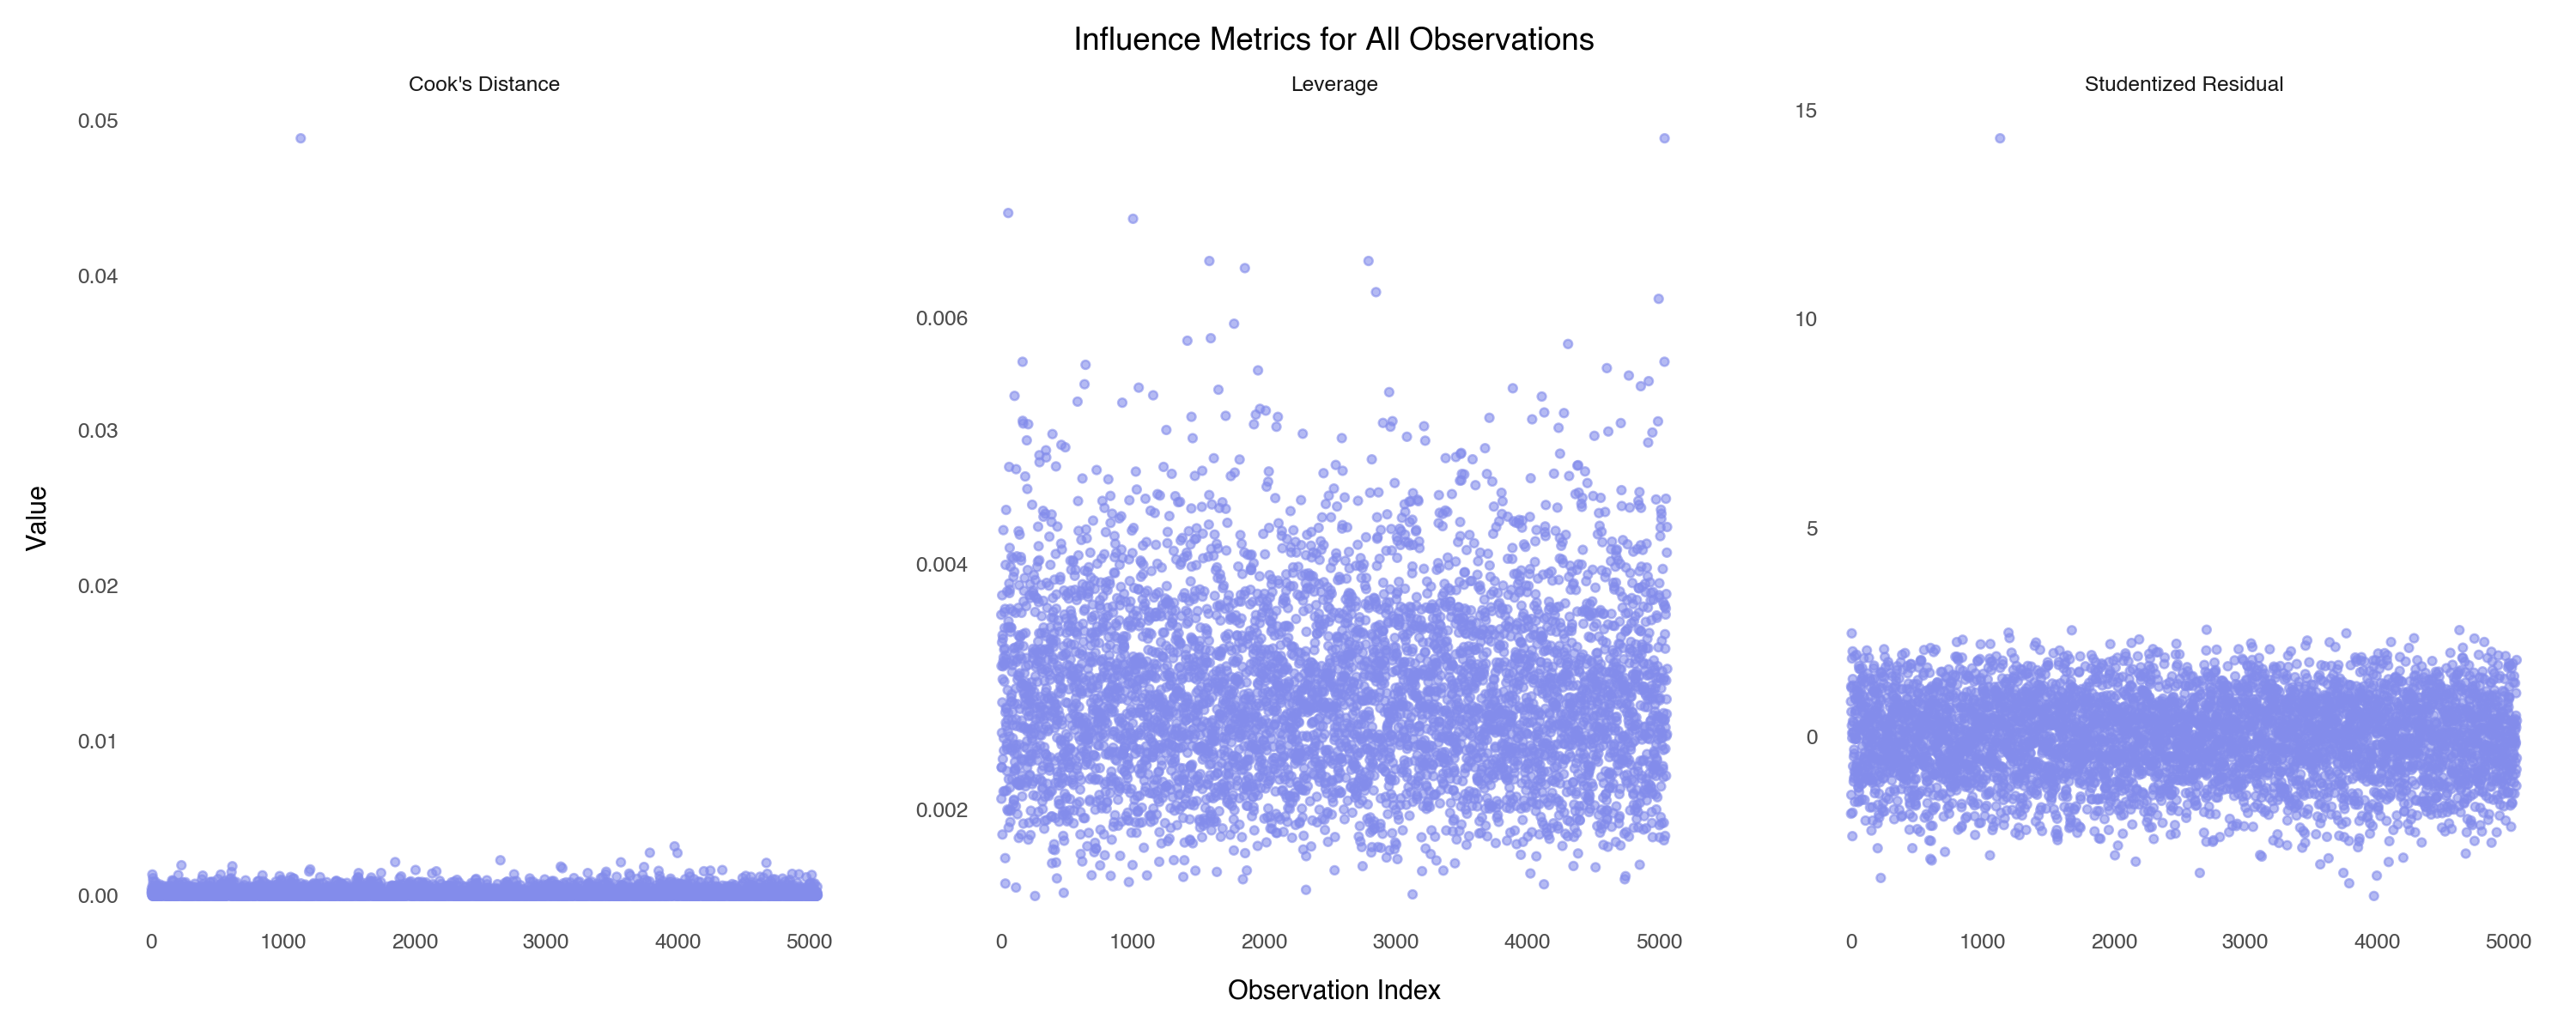

In [439]:

# Create a DataFrame with the influence measures
influence_data = pd.DataFrame({
    'Index': np.arange(len(train_low)),
    'Leverage': leverage,
    'Cook\'s Distance': cooks_distance,
    'Studentized Residual': studentized_residuals
})

# Melt the DataFrame to long format for plotting
df_melted = influence_data.melt(id_vars='Index', 
                     value_vars=['Leverage', 'Cook\'s Distance', 'Studentized Residual'], 
                     var_name='Metric', 
                     value_name='Value')

# Create the plot using plotnine
ggplot(df_melted, aes(x='Index', y='Value')) + \
    geom_point(color='#838ceb', alpha=0.6) + \
    facet_wrap('~Metric', scales='free_y', ncol=3) + \
    labs(title='Influence Metrics for All Observations', 
         x='Observation Index', 
         y='Value') + \
    theme_minimal() + \
    theme(
        figure_size=(15, 6),  # Adjusting the figure size to make it wider
        panel_spacing=0.025,
        panel_grid_major=element_blank(),  # Remove major grid lines
        panel_grid_minor=element_blank()  # Add a little space between panels
    )


<div class="alert alert-block alert-info">

These are the same just with and without the connection lines, pick whichever you find more appealing.

</dic>

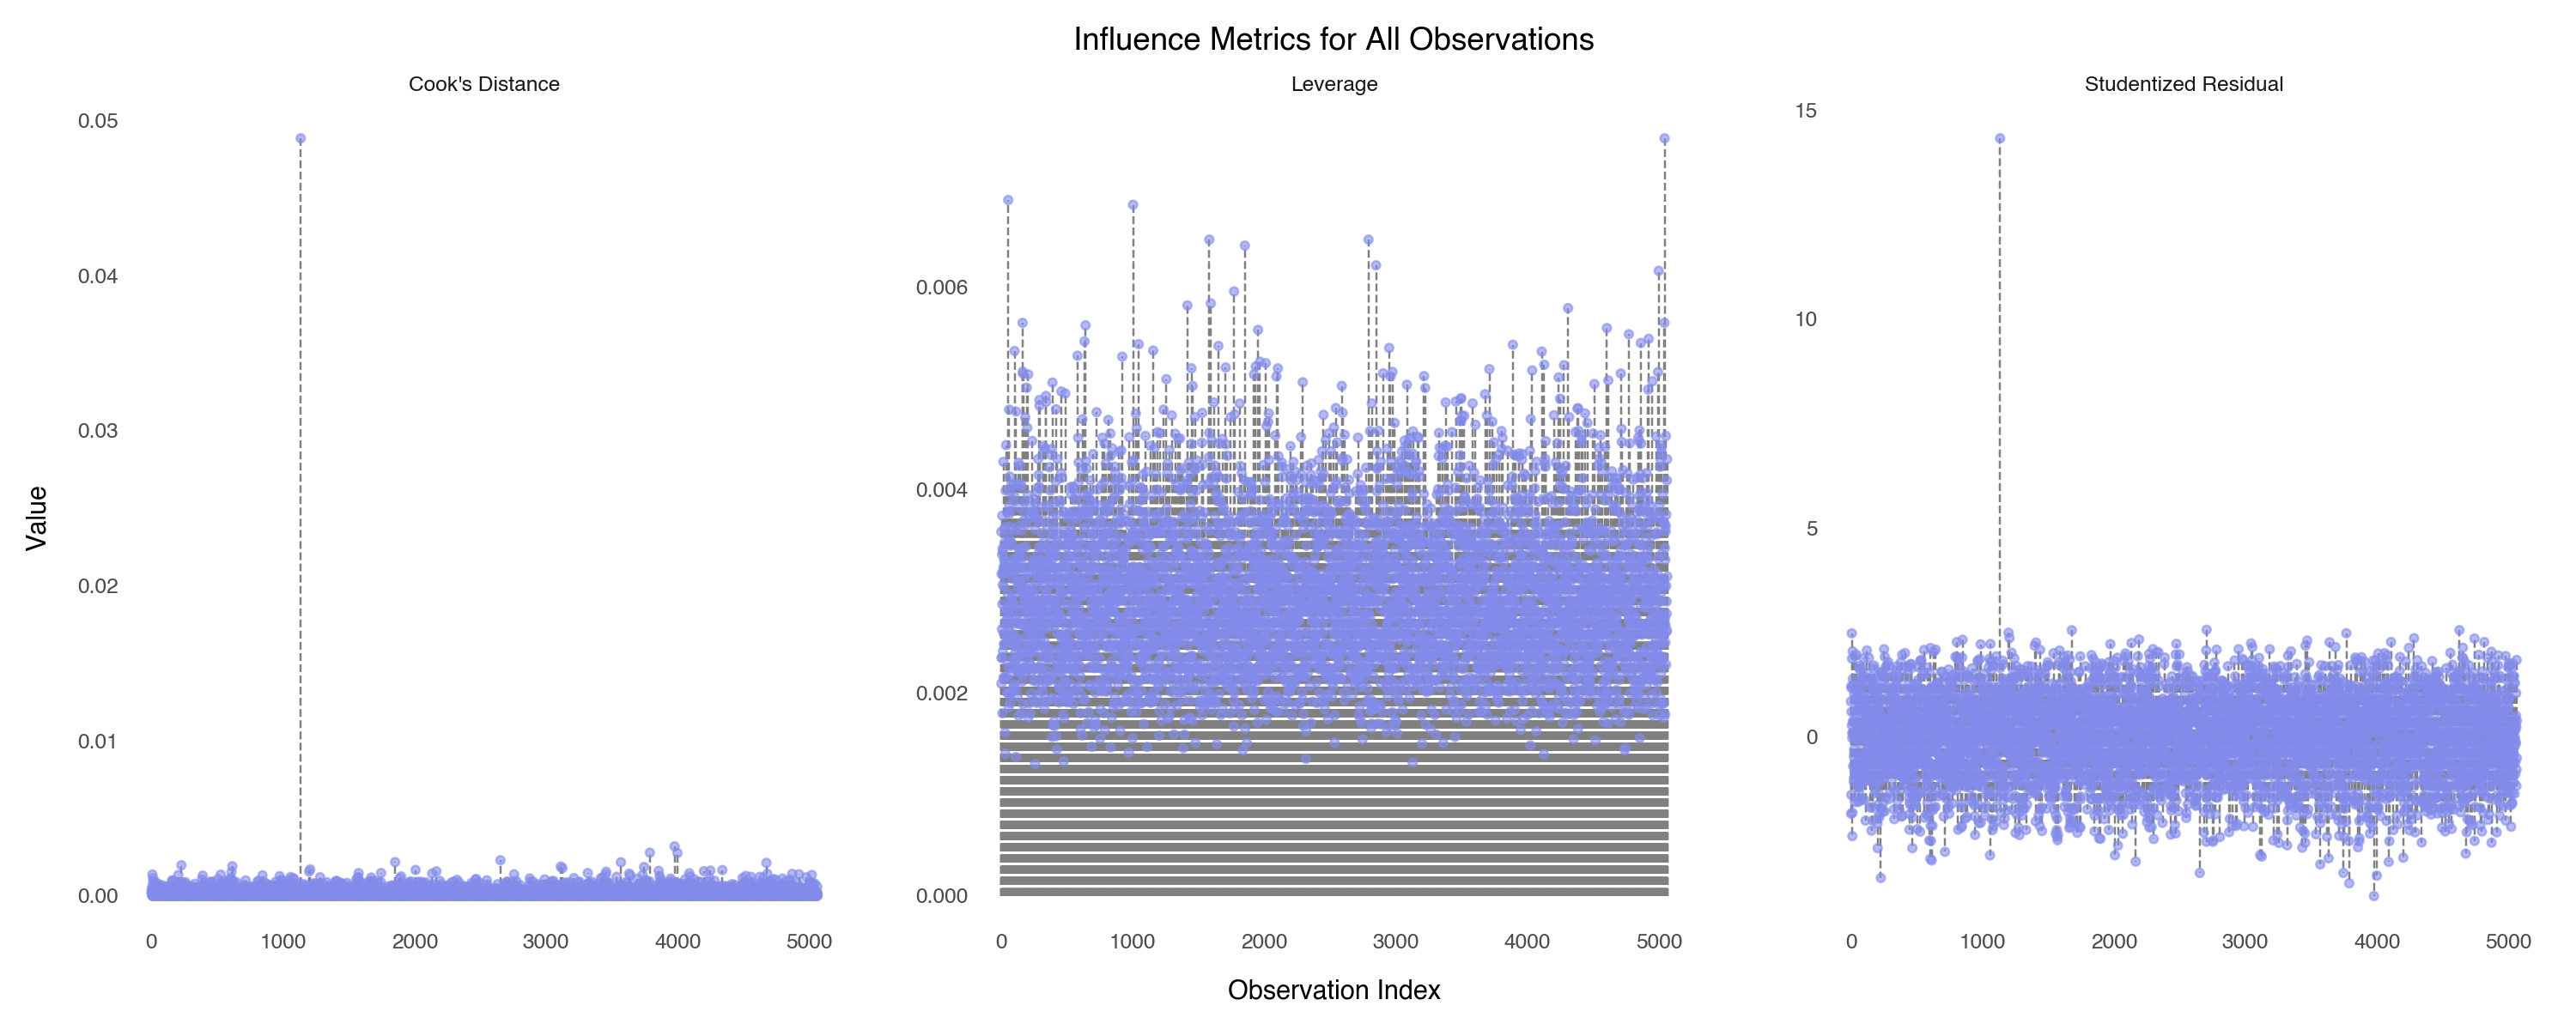

In [452]:
leverage_segments = df_melted[(df_melted['Metric'] == 'Leverage') & (df_melted['Value'] > 0.005)]

# Create the plot using plotnine with lines connecting the points to the x-axis
ggplot(df_melted, aes(x='Index', y='Value')) + \
    geom_segment(aes(x='Index', xend='Index', y=0, yend='Value'), color='grey', linetype='dashed') + \
    geom_point(color='#838ceb', alpha=0.6) + \
    facet_wrap('~Metric', scales='free_y', ncol=3) + \
    labs(title='Influence Metrics for All Observations', 
         x='Observation Index', 
         y='Value') + \
    theme_minimal() + \
    theme(
        figure_size=(15, 6),  # Wider figure
        panel_spacing=0.025,  # Adjust panel spacing
        panel_grid_major=element_blank(),  # Remove major grid lines
        panel_grid_minor=element_blank()  # Remove minor grid lines
    )

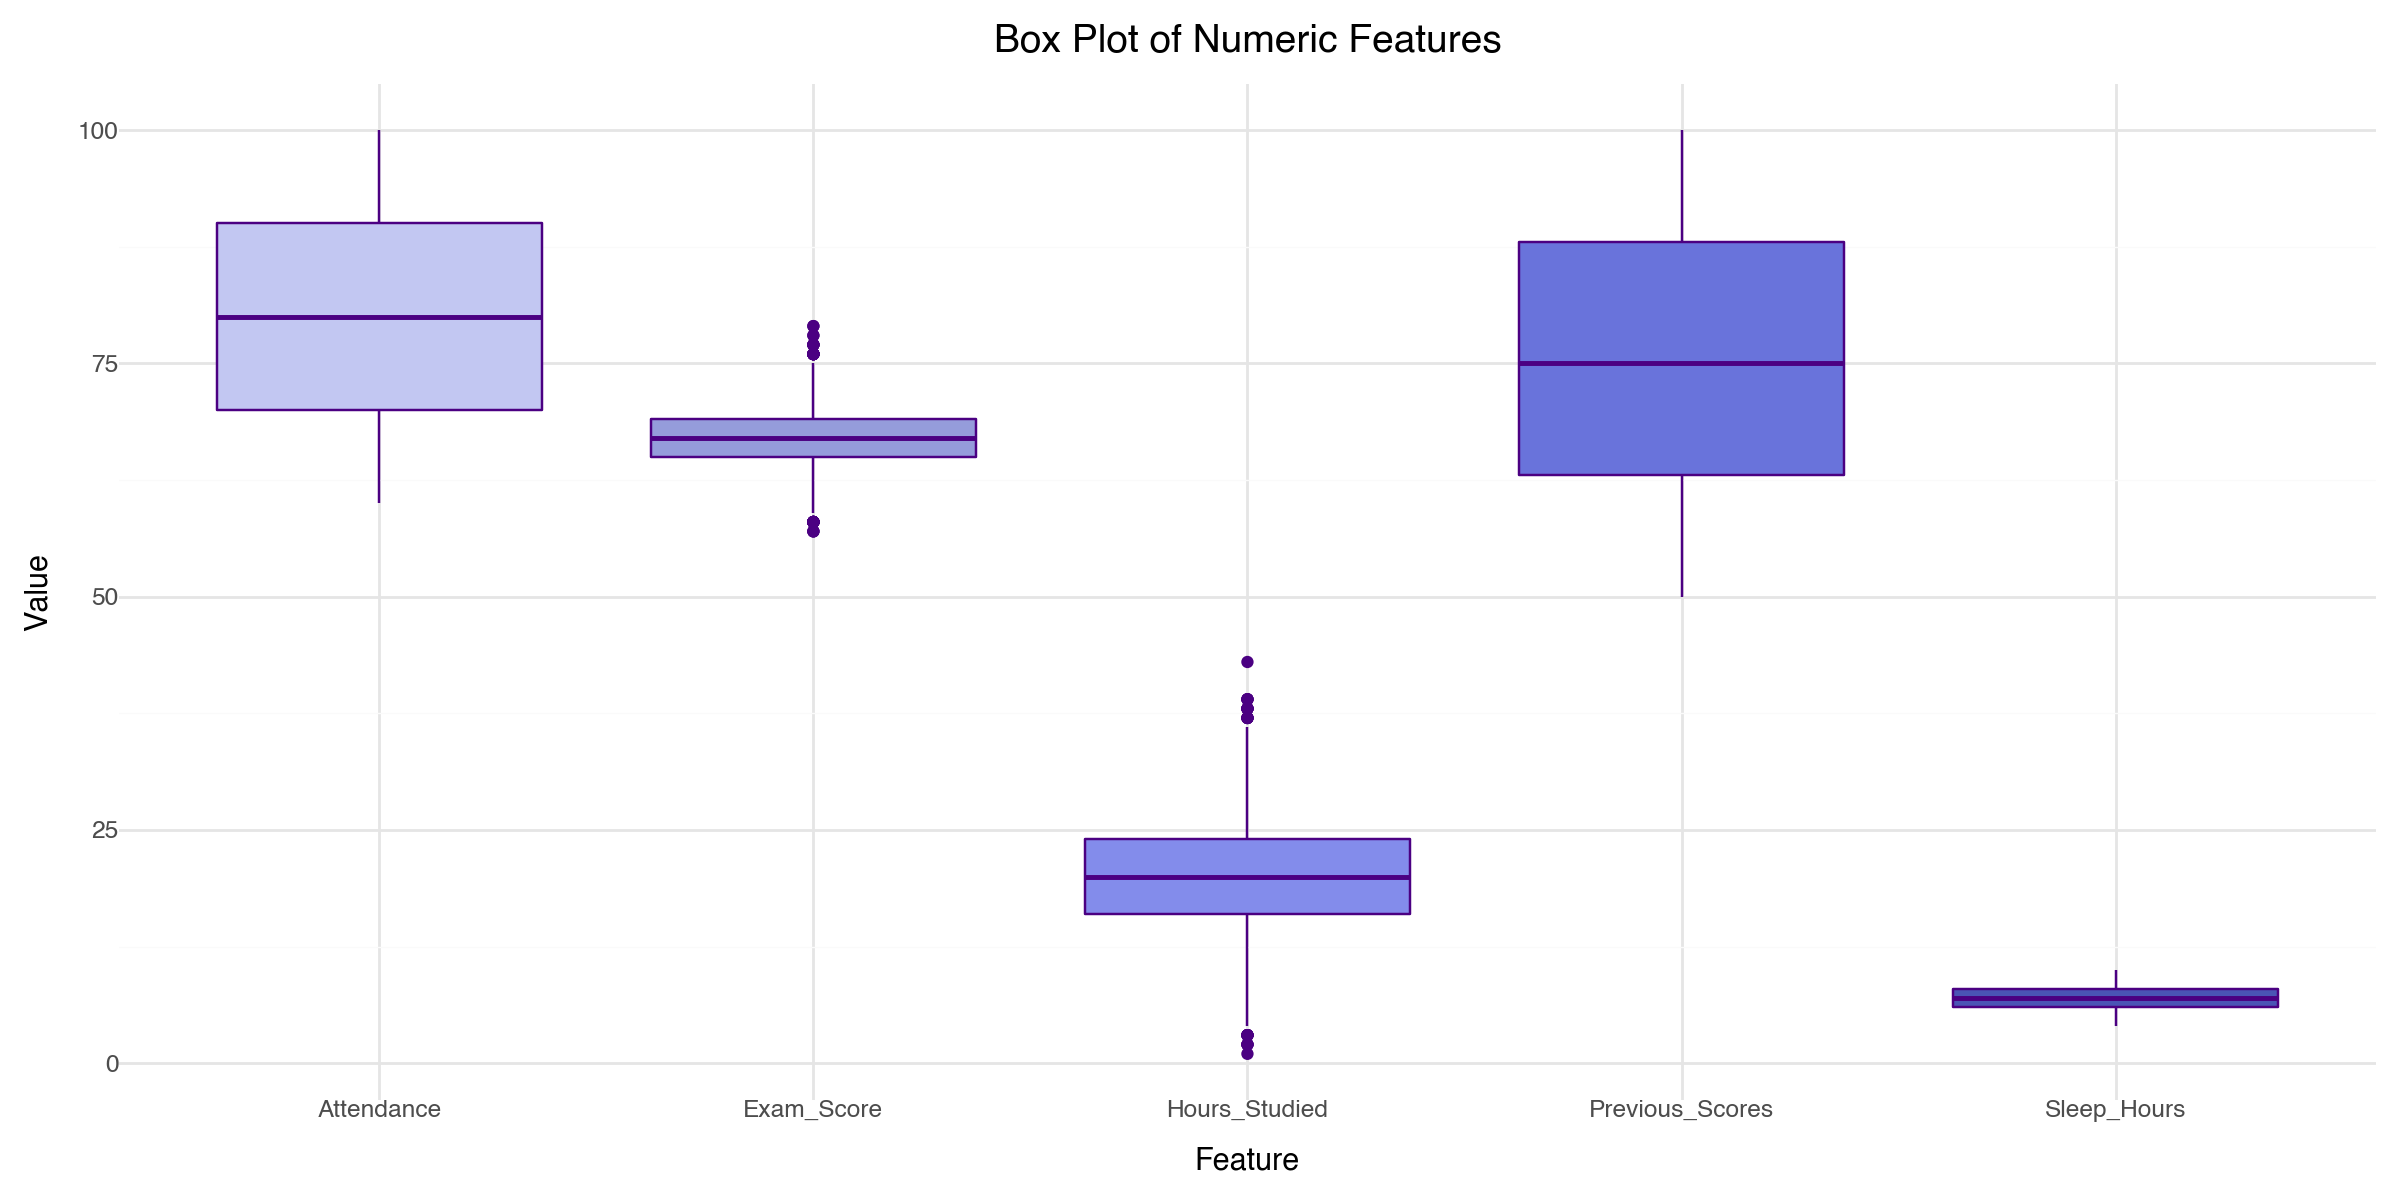

In [445]:
# Assuming 'train_low' is your DataFrame and numeric_columns contains the feature names
numeric_columns = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Exam_Score']

# Melt the DataFrame to long format for easier plotting
train_low_melted = train_low[numeric_columns].melt(var_name='Feature', value_name='Value')

# Define custom color palette with different shades of blues and purples
custom_colors = [
    '#c2c7f2',
    '#959cdb',
    '#838ceb',  
    '#6973db',  
    '#4a54b5',  
] 

# Create the boxplot using plotnine with multiple color shades
ggplot(train_low_melted, aes(x='Feature', y='Value', fill='Feature')) + \
    geom_boxplot(color='#4B0082') + \
    scale_fill_manual(values=custom_colors) + \
    labs(title='Box Plot of Numeric Features', x='Feature', y='Value') + \
    theme_minimal() + \
    theme(
        figure_size=(12, 6),  # Adjust the size of the plot
        axis_text_x=element_text(rotation=0, hjust=0.5),  # Ensure horizontal x-axis labels
        plot_title=element_text(size=14, weight='bold'),  # Customize the title font
        legend_position='none'  # Hide the legend as colors are used for boxes only
    )

/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/3645718402.py:34: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_segment : Removed 5064 rows containing missing values.


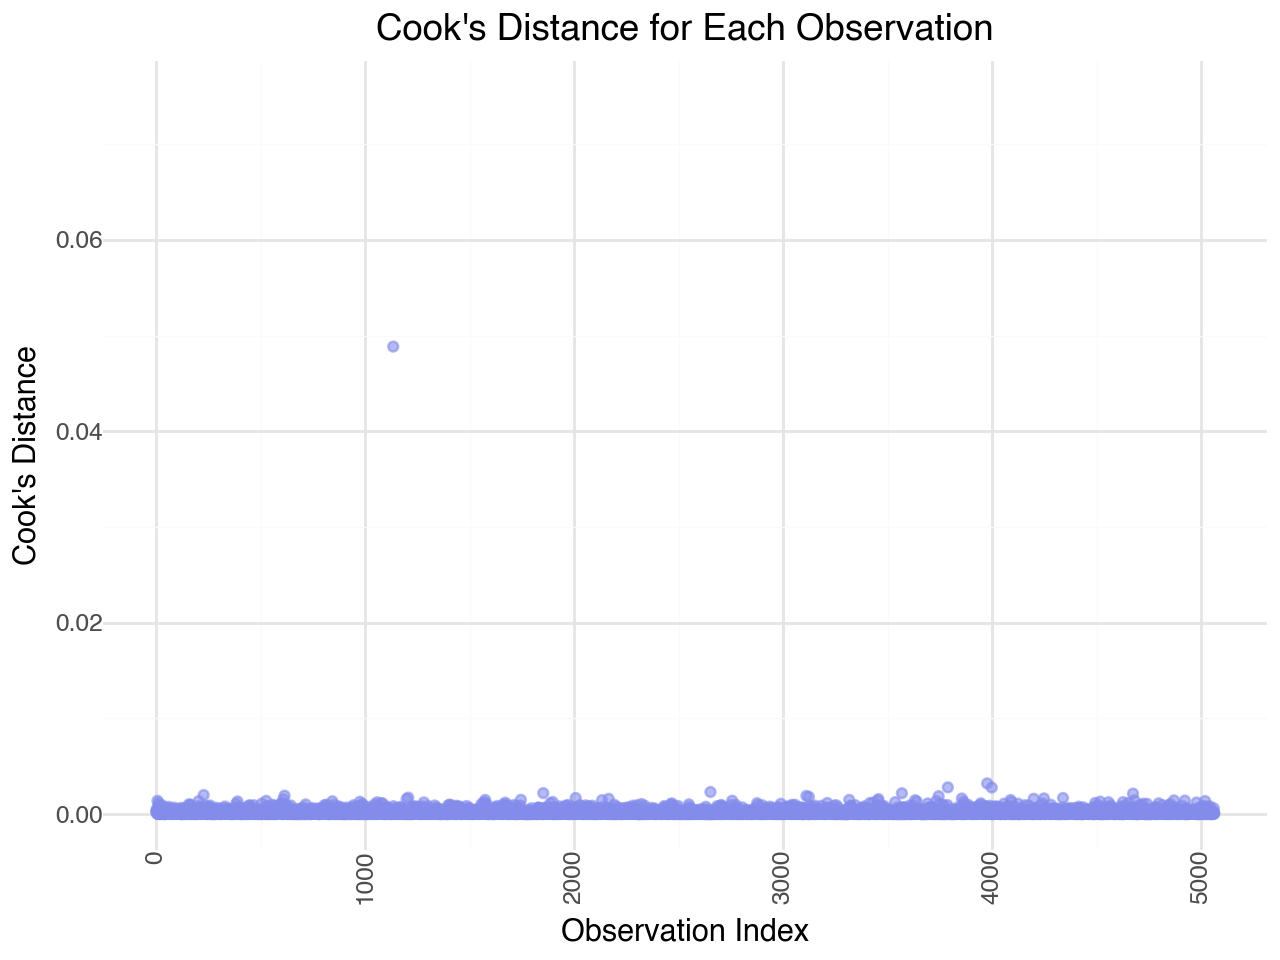

In [422]:
# Assuming lasso_model_low is already fitted
influence1 = OLSInfluence(lasso_model_low)
cooks_d1, _ = influence1.cooks_distance

# Create a DataFrame with Cook's distance
cooks_distance_df = pd.DataFrame({
    'Observation Index': np.arange(len(cooks_d1)),
    'Cook\'s Distance': cooks_d1
})

# Get the absolute residuals to find the largest deviations
abs_residuals_low = np.abs(lasso_model_low.resid)

# Find the indices of the two largest residuals
top_two_outliers_idx = abs_residuals_low.nlargest(2).index
top_two_outliers = train_low.loc[top_two_outliers_idx]

# Create the Cook's Distance plot using Plotnine
cooks_plot = (ggplot(cooks_distance_df, aes(x='Observation Index', y='Cook\'s Distance')) +
               geom_point(color="#838ceb", alpha=0.6) +  # Scatter plot for Cook's distance
               geom_segment(aes(x=min(cooks_distance_df['Observation Index']),
                                xend=max(cooks_distance_df['Observation Index']),
                                y=0.5, yend=0.5),  # Horizontal line at a threshold, set to 0.5
                            color='#373f8a', linetype='dashed') +  # Add a threshold line (adjust the y value as needed)
               labs(title='Cook\'s Distance for Each Observation',
                    x='Observation Index',
                    y='Cook\'s Distance') +
               scale_y_continuous(limits=(0, 0.075)) +  # Set y-axis limits from 0 to 1
               theme_minimal() +  # Clean theme
               theme(axis_text_x=element_text(rotation=90))  # Rotate x-axis labels for better visibility
              )

# Display the Cook's Distance plot
print(cooks_plot)

/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/3053929931.py:23: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


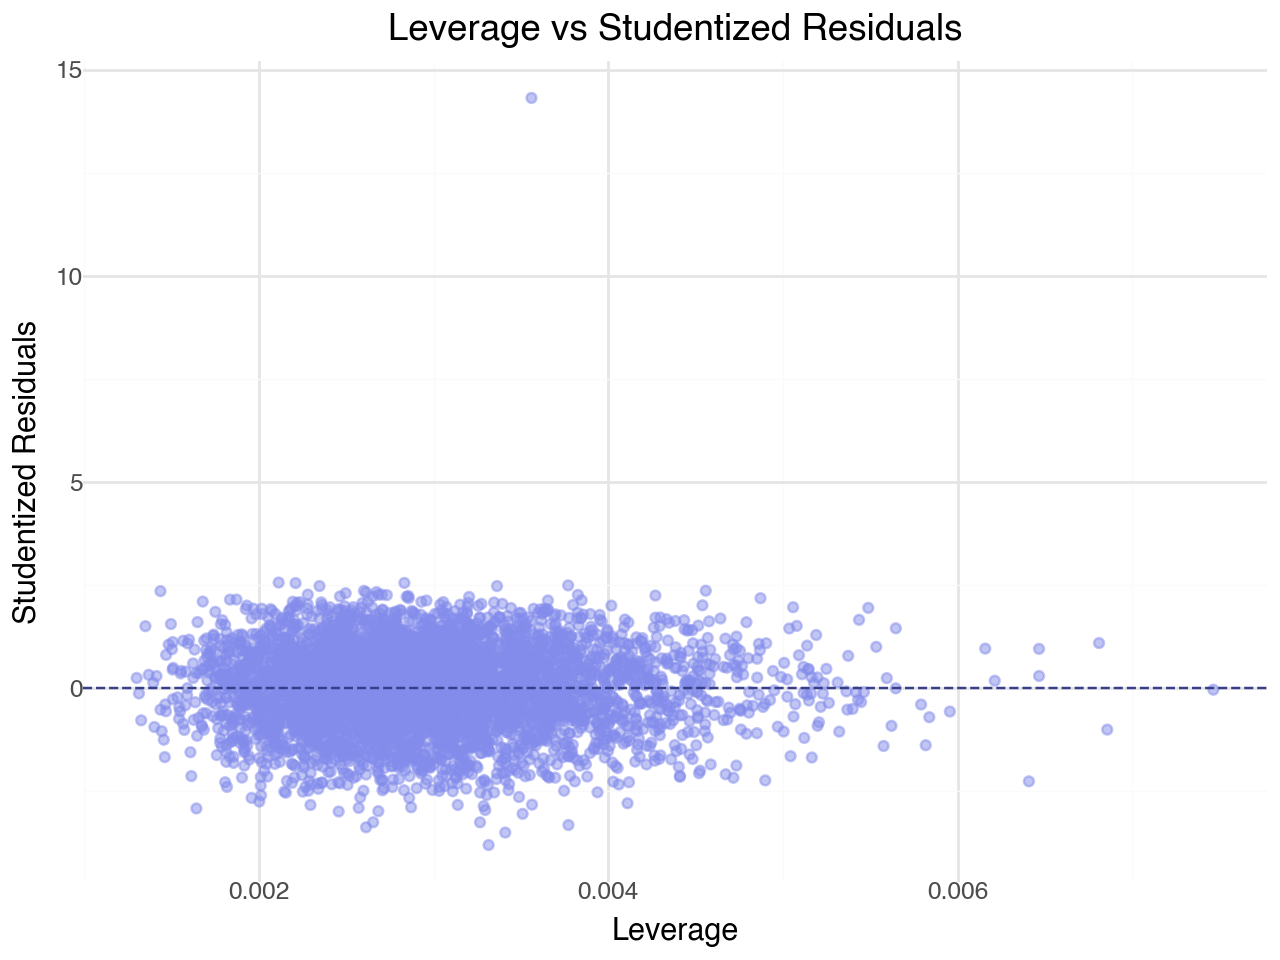

In [370]:
# Assuming `influence` has already been defined based on your fitted model
leverage2 = influence.hat_matrix_diag
student_resid2 = influence.resid_studentized_internal

# Create a DataFrame for leverage and studentized residuals
leverage_df = pd.DataFrame({
    'Leverage': leverage2,
    'Studentized Residuals': student_resid2,
    'Outlier': [False] * len(leverage2)  # Create a column to mark outliers
})

# Create the Leverage vs. Studentized Residuals plot using Plotnine
leverage_plot = (ggplot(leverage_df, aes(x='Leverage', y='Studentized Residuals')) +
                 geom_point(color="#838ceb", alpha=0.5) +  # Scatter plot with coloring for outliers
                 geom_hline(yintercept=0, color='#373f8a', linetype='dashed') +  # Horizontal line at y=0
                 labs(title='Leverage vs Studentized Residuals',
                      x='Leverage',
                      y='Studentized Residuals') +  # Custom color for outliers
                 theme_minimal()  # Clean theme
                )

# Display the leverage vs. studentized residuals plot
print(leverage_plot)

/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/916691344.py:20: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


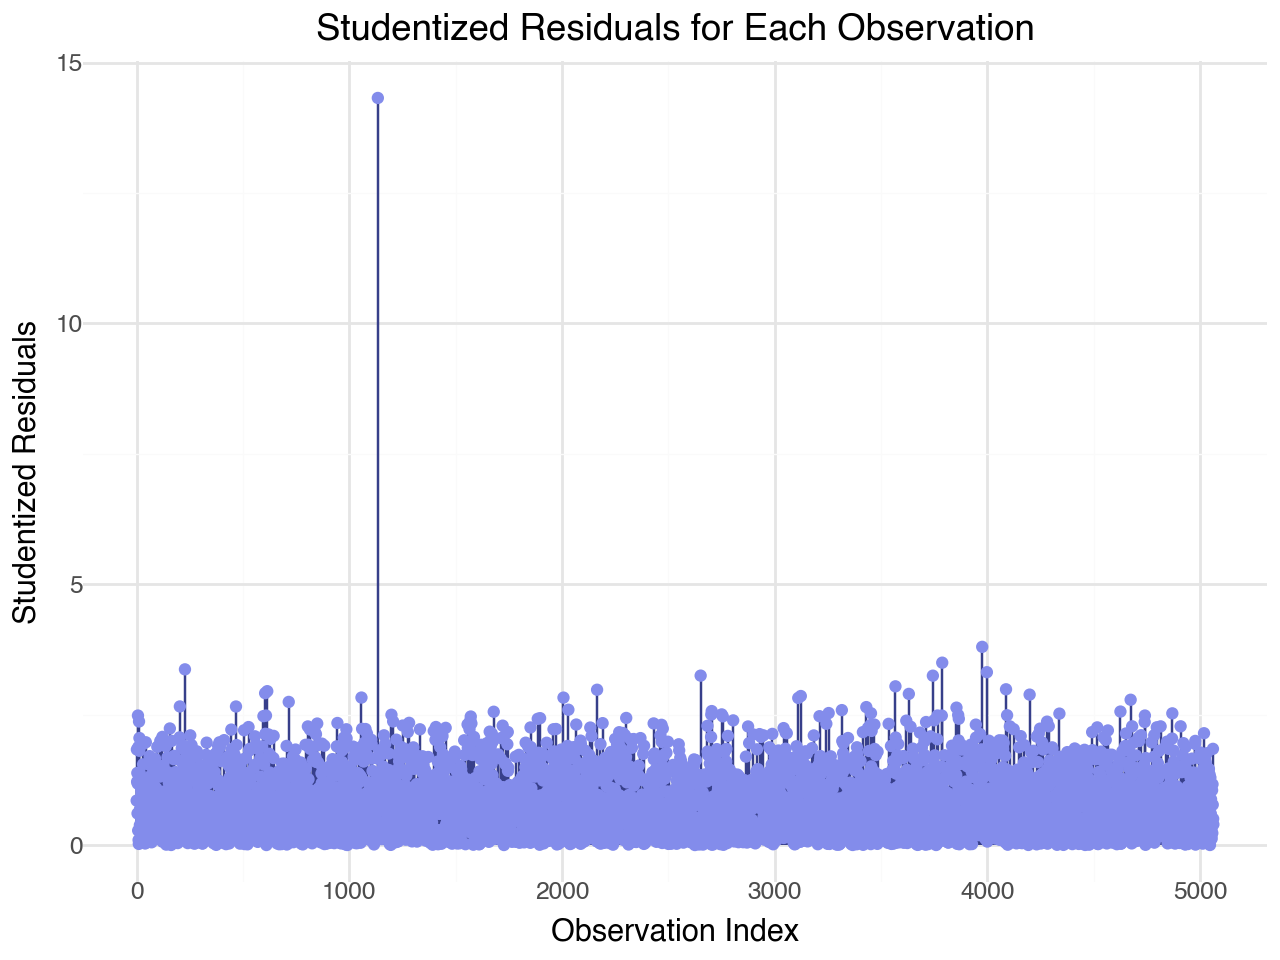

IndexError: index 5125 is out of bounds for axis 0 with size 5064

In [453]:
# Create a DataFrame for studentized residuals
student_residuals_df = pd.DataFrame({
    'Observation Index': np.arange(len(student_resid2)),
    'Studentized Residuals': np.abs(student_resid2)
})

# Create the Studentized Residuals plot using Plotnine
student_residuals_plot = (ggplot(student_residuals_df, aes(x='Observation Index', y='Studentized Residuals')) +
                          geom_segment(aes(x='Observation Index', xend='Observation Index', 
                                           y=0, yend='Studentized Residuals'), 
                                       color='#373f8a') +  # Vertical lines
                          geom_point(color="#838ceb") +  # Points for the residuals
                          labs(title='Studentized Residuals for Each Observation',
                               x='Observation Index',
                               y='Studentized Residuals') +
                          theme_minimal()  # Clean theme
                         )

# Display the Studentized Residuals plot
print(student_residuals_plot)

# Check the values for your specific rows
print(f"Studentized residual for row 5125: {student_resid2[5125]}")
print(f"Studentized residual for row 2542: {student_resid2[2542]}")

## Testing the Low Model:

In [337]:
# Adding a constant to the test set for the intercept term (if required by statsmodels)
X_test = sm.add_constant(X_test_low)

# Use your previously trained model to predict y_test
y_pred = lasso_model_low.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test_low, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test_low, y_pred)
r2 = r2_score(y_test_low, y_pred)

# Print the results
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 1.2658230069319085
RMSE: 1.1250879996390988
MAE: 0.8514178758116681
R-squared: 0.8872329372713124


y_test_low shape: 1266, y_pred shape: 1266


/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/1607017618.py:23: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


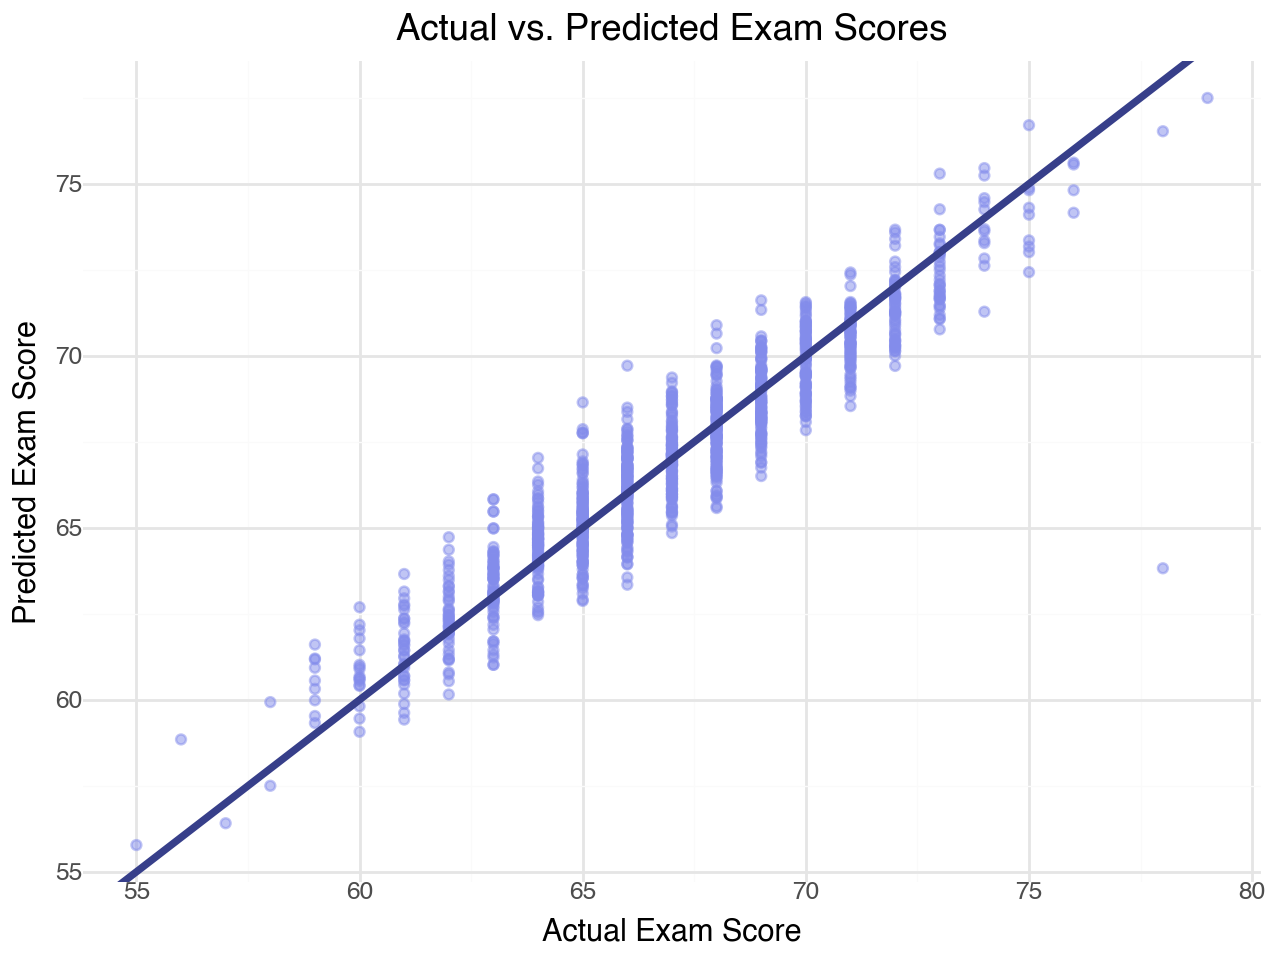

In [342]:
# Check if y_test_low and y_pred have data
print(f"y_test_low shape: {len(y_test_low)}, y_pred shape: {len(y_pred)}")

# Create a DataFrame from y_test_low and y_pred
results = pd.DataFrame({
    'Actual': y_test_low,
    'Predicted': y_pred
})

# Create the scatter plot using Plotnine
gg_plot = (ggplot(results, aes(x='Actual', y='Predicted')) +
            geom_point(alpha=0.5, color="#838ceb") +  # Scatter plot of actual vs predicted
            geom_abline(intercept=0, slope=1, color='#373f8a', size=1.5) +  # Line of perfect fit
            labs(
                x='Actual Exam Score',
                y='Predicted Exam Score',
                title='Actual vs. Predicted Exam Scores'
            ) +
            theme_minimal()  # Set figure size
           )

# Display the plot
print(gg_plot)

## High Model

In [189]:
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_train_low),
    ('lasso', Lasso(alpha=0.1))  # You can adjust alpha for regularization
])

# Fit the model to the entire dataset
lasso_pipeline.fit(X_train_low, y_train_low)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
       'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Learning_Disabilities', 'Parental_Education_Level', 'Gender'],
      dtype='object'))])),
                ('lasso', Lasso(alpha=0.1))])

In [191]:
# Get feature names after one-hot encoding
encoded_categorical_names = lasso_pipeline.named_steps['preprocessor'] \
    .transformers_[1][1].get_feature_names_out(categorical_cols3)

# Combine numerical and encoded categorical column names
all_feature_names = list(numerical_cols3) + list(encoded_categorical_names)

# Get the coefficients of the Lasso model
lasso_coefficients = lasso_pipeline.named_steps['lasso'].coef_

# Select features with non-zero coefficients
selected_features = [name for name, coef in zip(all_feature_names, lasso_coefficients) if coef != 0]

print(f'Selected predictors: {selected_features}')

Selected predictors: ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Access_to_Resources_Low', 'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes', 'Motivation_Level_Low', 'Family_Income_Low', 'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate']


In [194]:
x_lasso_train = X_train_high.drop(columns=['Sleep_Hours', 
                      'Internet_Access', 
                      'Teacher_Quality', 'School_Type', 'Learning_Disabilities', 
                       'Gender'])
y_lasso_train = y_train_high
formula = 'Exam_Score ~ ' + ' + '.join(x_lasso_train.columns)

In [195]:
lasso_model_high = smf.ols(formula= formula, data = train_high).fit()
lasso_model_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Exam_Score   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     5.296
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           0.000224
Time:                        13:38:35   Log-Likelihood:                -98.787
No. Observations:                  38   AIC:                             227.6
Df Residuals:                      23   BIC:                             252.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   55.3398      7.253      7.630      0.000      40.335      70.344
Access_to_Resources[T.Low]                  -5.9329      2.090     -2.838      0.009     -10.257      -1.609
Access_to_Resources[T.Medium]                1.5168      1.980      0.766      0.452      -2.580       5.614
Extracurricular_Activities[T.Yes]            0.4708      1.681      0.280      0.782      -3.006       3.948
Motivation_Level[T.Low]                     -0.6943      2.286     -0.304      0.764      -5.423       4.035
Motivation_Level[T.Medium]                  -0.6988      1.946     -0.359      0.723      -4.724       3.327
Family_Income[T.Low]                        -1.0492      2.125     -0.494      0.626      -5.445       3.346
Family_Income[T.Medium]                      1.8384      2.106      0.873      0.392      -2.518       6.195
Parental_Education_Level[T.High School]      2.1398      1.775      1.206      0.240      -1.531       5.811
Parental_Education_Level[T.Postgraduate]     1.7893      2.396      0.747      0.463      -3.166       6.745
Hours_Studied                                0.0383      0.128      0.299      0.768      -0.227       0.304
Attendance                                   0.2626      0.079      3.329      0.003       0.099       0.426
Previous_Scores                              0.1680      0.049      3.429      0.002       0.067       0.269
Tutoring_Sessions                           -0.1588      0.692     -0.229      0.821      -1.591       1.274
Physical_Activity                           -0.1351      0.703     -0.192      0.849      -1.589       1.318
==============================================================================
Omnibus:                        1.505   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.130
Skew:                           0.420   Prob(JB):                        0.568
Kurtosis:                       2.915   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/1803543248.py:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


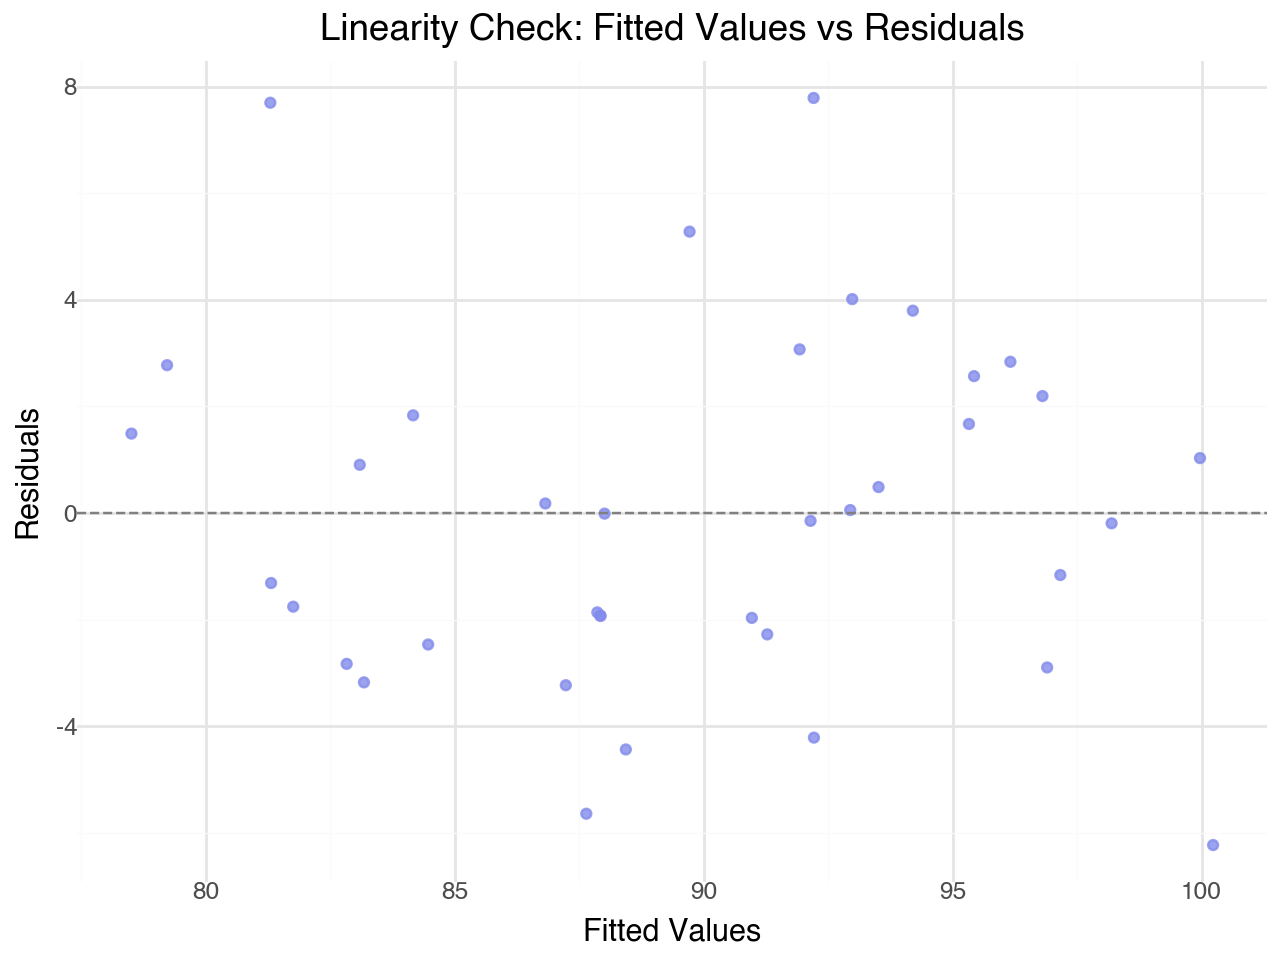

In [324]:
df = pd.DataFrame({
    'Fitted Values': lasso_model_high.fittedvalues,
    'Residuals': lasso_model_high.resid
})

# Build the plot
gg = (ggplot(df, aes(x='Fitted Values', y='Residuals')) +
      geom_point(color='#838ceb', alpha=0.8) +  # Scatter plot
      geom_hline(yintercept=0, linetype='dashed', color='gray') +  # Horizontal line at y=0
      labs(title='Linearity Check: Fitted Values vs Residuals',
           x='Fitted Values',
           y='Residuals') +
      theme_minimal()  # Clean minimal theme
)

# Display the plot
print(gg)

/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/40463544.py:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


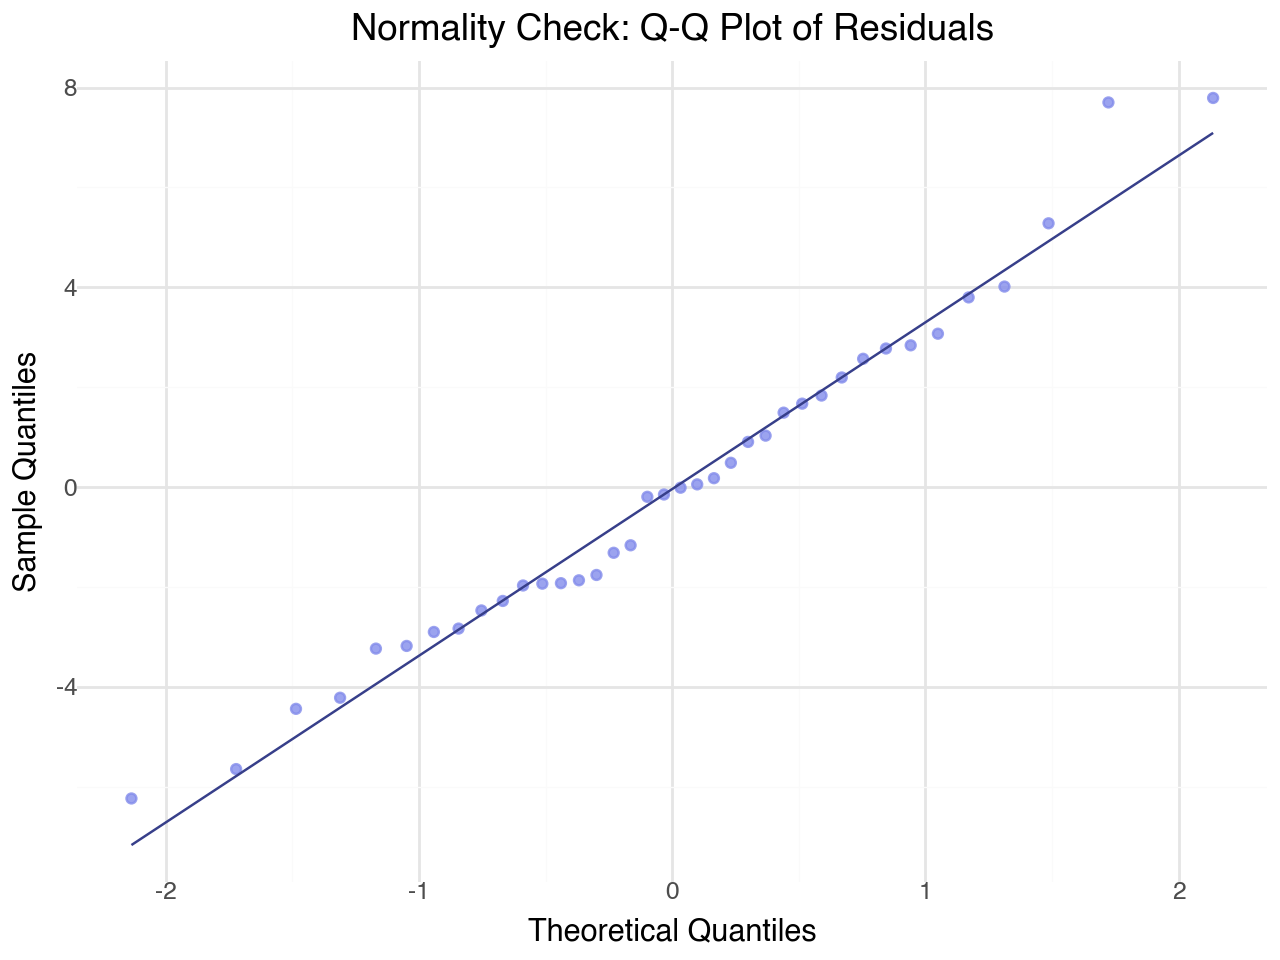

In [328]:
# Create a DataFrame for the residuals
df_resid = pd.DataFrame({
    'Residuals': lasso_model_high.resid
})

# Build the Q-Q plot
gg_qq = (ggplot(df_resid, aes(sample='Residuals')) +
         stat_qq(color='#838ceb', alpha=0.8) +  # Q-Q points
         stat_qq_line(color='#373f8a') +  # Line representing normal distribution
         labs(title='Normality Check: Q-Q Plot of Residuals',
              x='Theoretical Quantiles',
              y='Sample Quantiles') +
         theme_minimal()  # Clean minimal theme
)

# Display the Q-Q plot
print(gg_qq)

/var/folders/9r/tnq8p07x6g717k6kdnjx4fq80000gn/T/ipykernel_3226/335440657.py:23: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/homebrew/anaconda3/lib/python3.12/site-packages/plotnine/themes/themeable.py:2419: FutureWarning: You no longer need to use subplots_adjust to make space for the legend or text around the panels. This paramater will be removed in a future version. You can still use 'plot_margin' 'panel_spacing' for your other spacing needs.


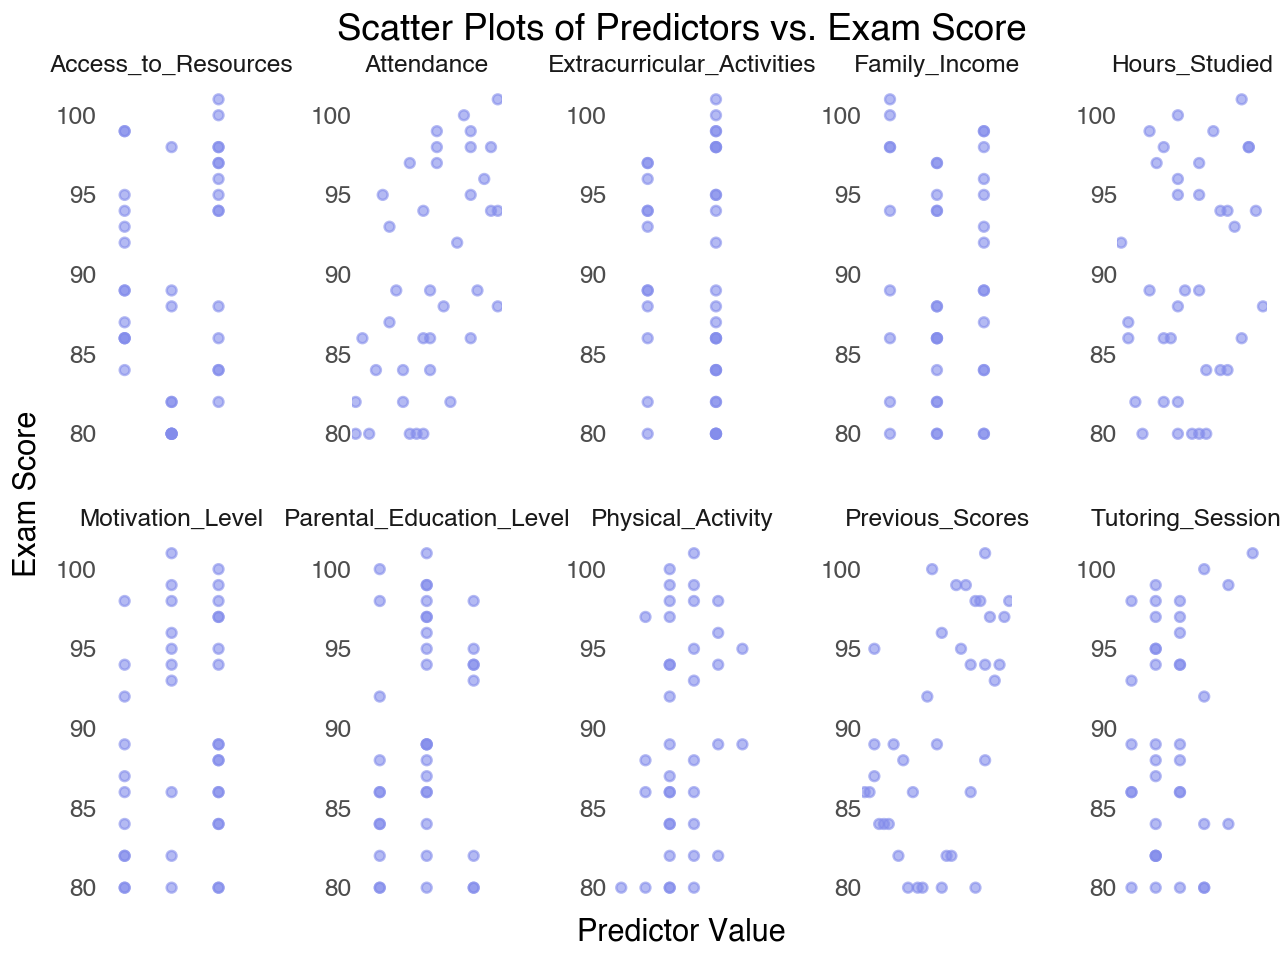

In [343]:
# Prepare the data
train_high_long = train_high.melt(id_vars='Exam_Score', value_vars=x_lasso_train.columns, 
                          var_name='Predictor', value_name='Value')

# Build the plot with custom theme
gg_scatter = (ggplot(train_high_long, aes(x='Value', y='Exam_Score')) +
              geom_point(color='#838ceb', alpha=0.6) +  # Scatter plot with some transparency
              facet_wrap('~Predictor', nrow=2, scales= 'free') +  # Create a grid layout with 2 rows
              labs(title='Scatter Plots of Predictors vs. Exam Score',
                   x='Predictor Value',
                   y='Exam Score') +
              theme_minimal() +  # Clean minimal theme
              theme(
                  axis_text_x=element_blank(),  # Remove x-axis tick labels
                  panel_grid_major=element_blank(),  # Remove major grid lines
                  panel_grid_minor=element_blank(),  # Remove minor grid lines
                  subplots_adjust={'top': 0.9},  # Adjust title position
                  panel_spacing = 0.05
              )
)

# Display the scatter plot grid
print(gg_scatter)

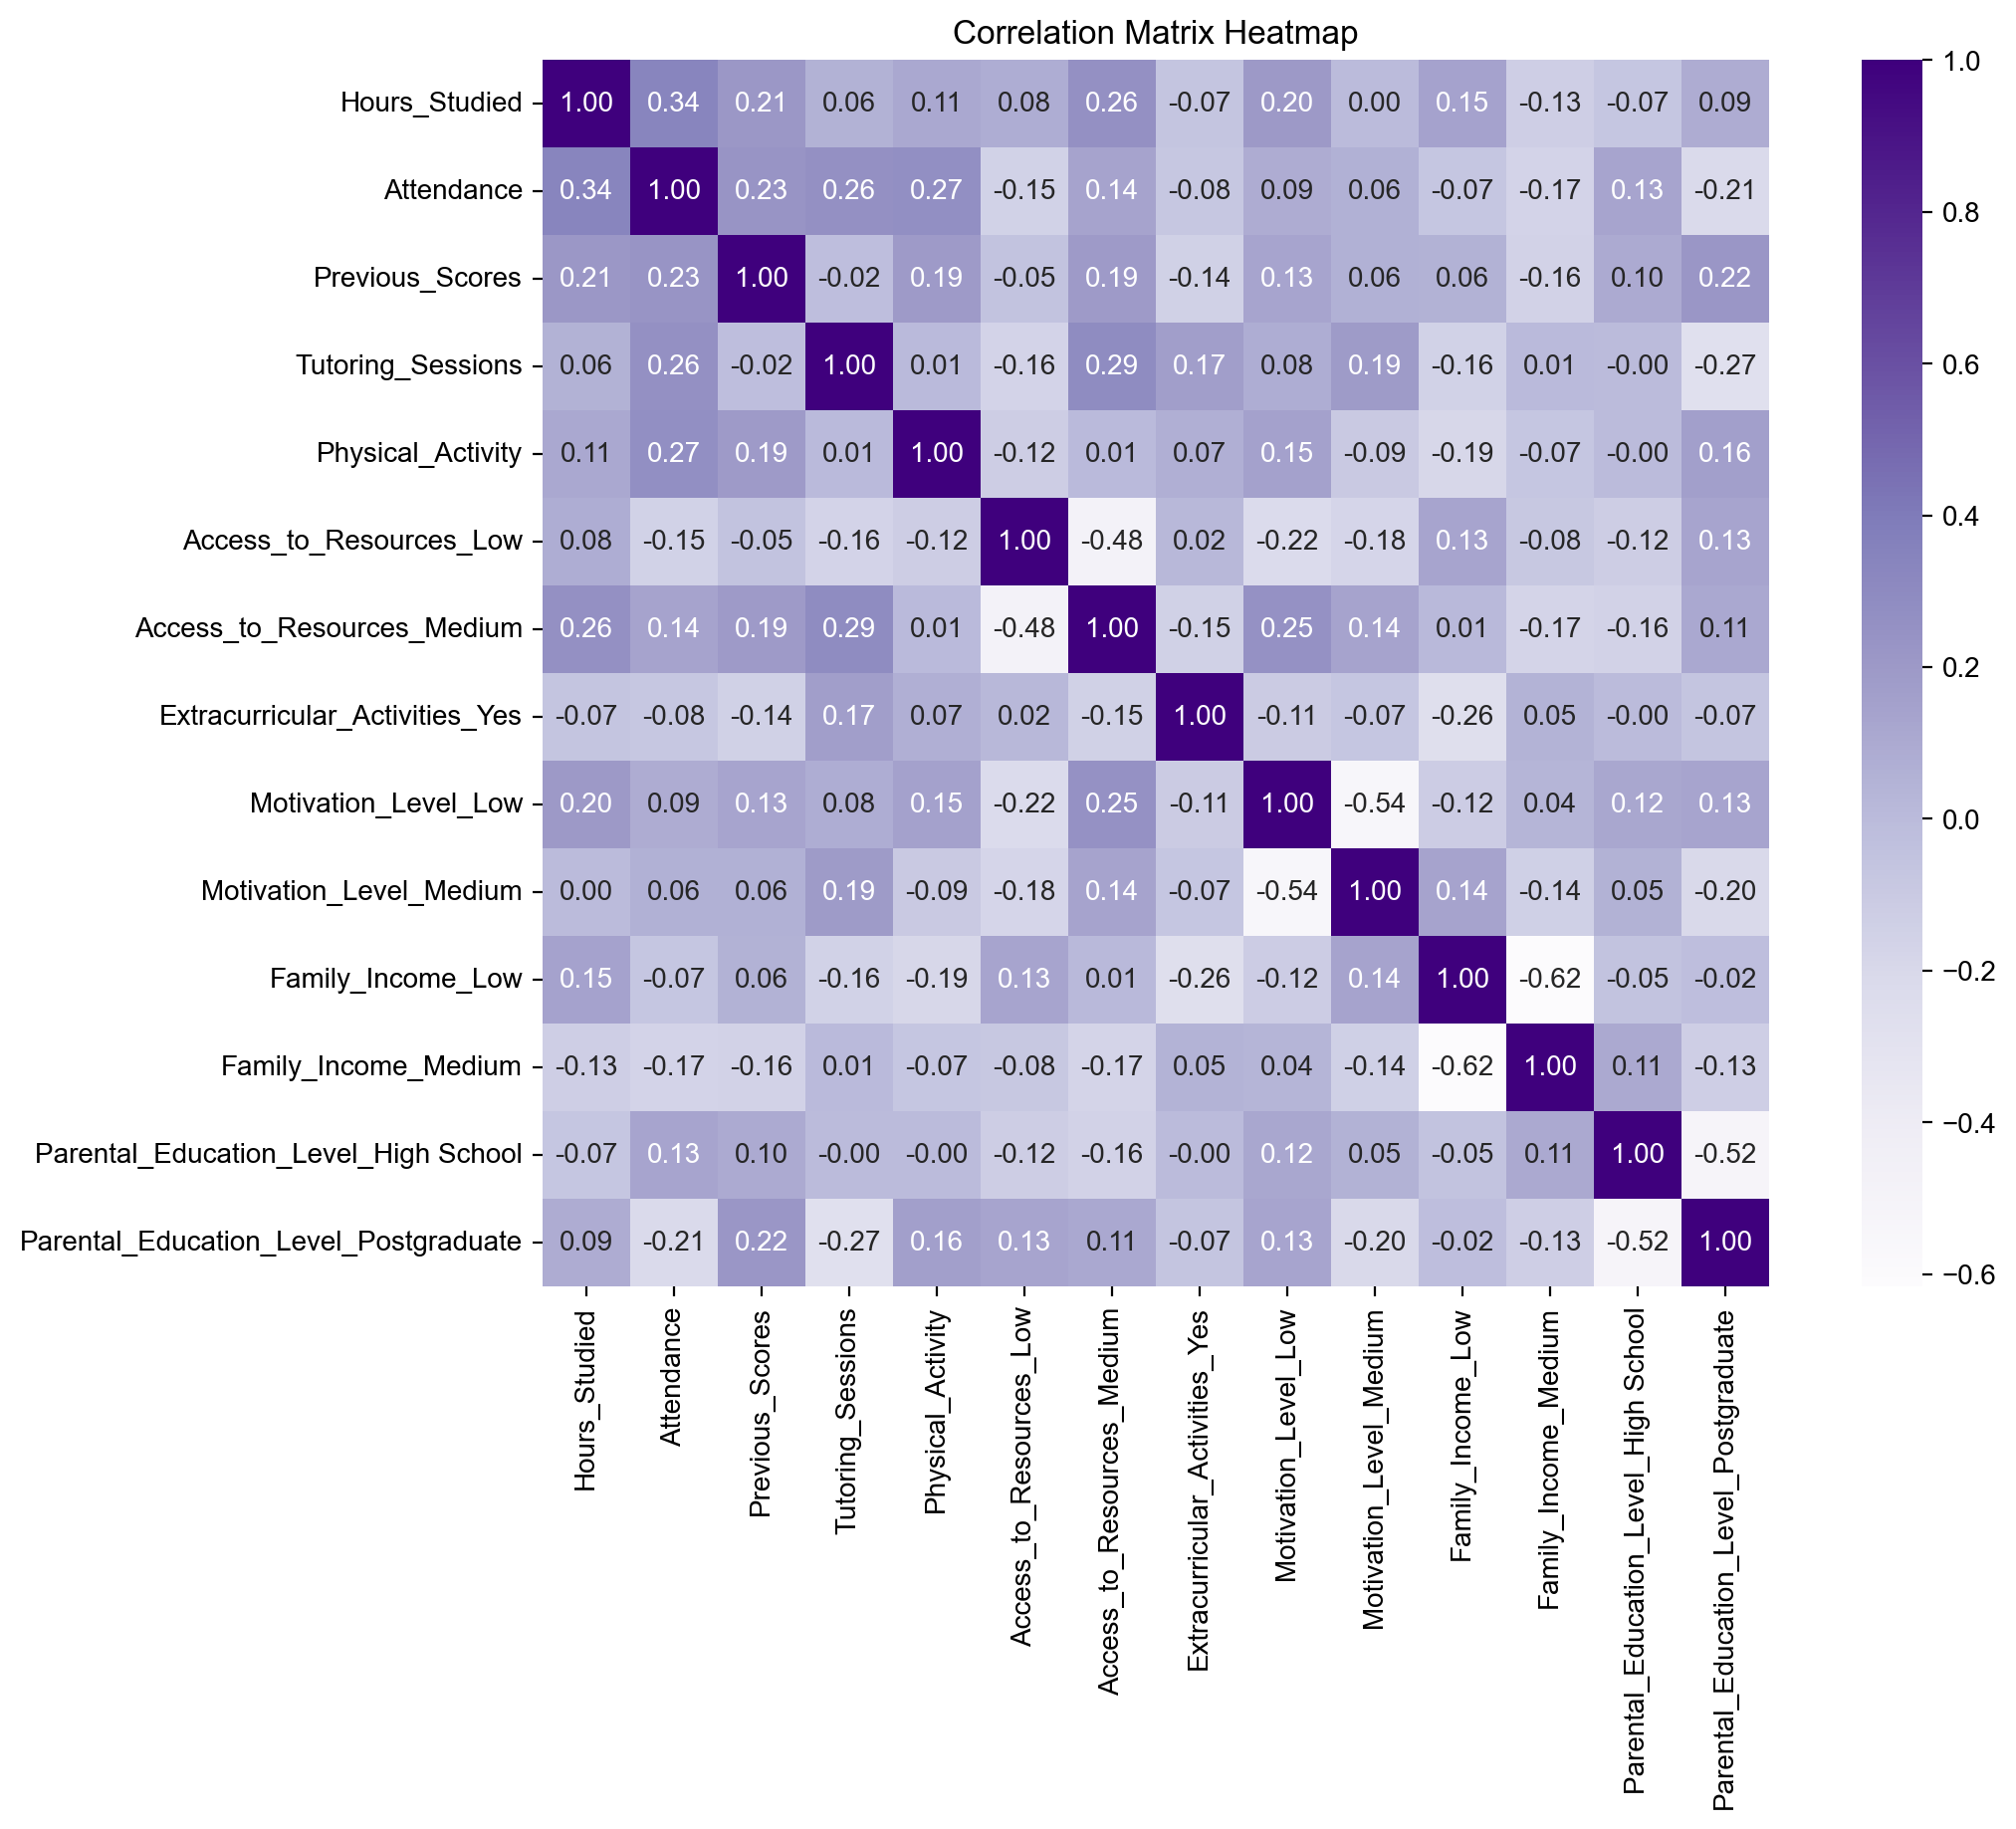

In [344]:
non_numeric_cols = x_lasso_train.select_dtypes(exclude='number').columns

X_encoded = pd.get_dummies(x_lasso_train, drop_first=True)

correlation_matrix = X_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Purples', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [347]:
# Adding a constant to the test set for the intercept term (if required by statsmodels)
X_test_2 = sm.add_constant(X_test_high)

# Use your previously trained model to predict y_test
y_pred = lasso_model_high.predict(X_test_2)

# Evaluate the model
mse = mean_squared_error(y_test_high, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test_high, y_pred)
r2 = r2_score(y_test_high, y_pred)

# Print the results
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')

MSE: 30.234089664871277
RMSE: 5.4985534156604565
MAE: 3.990926224355698
R-squared: -0.3521507005756386


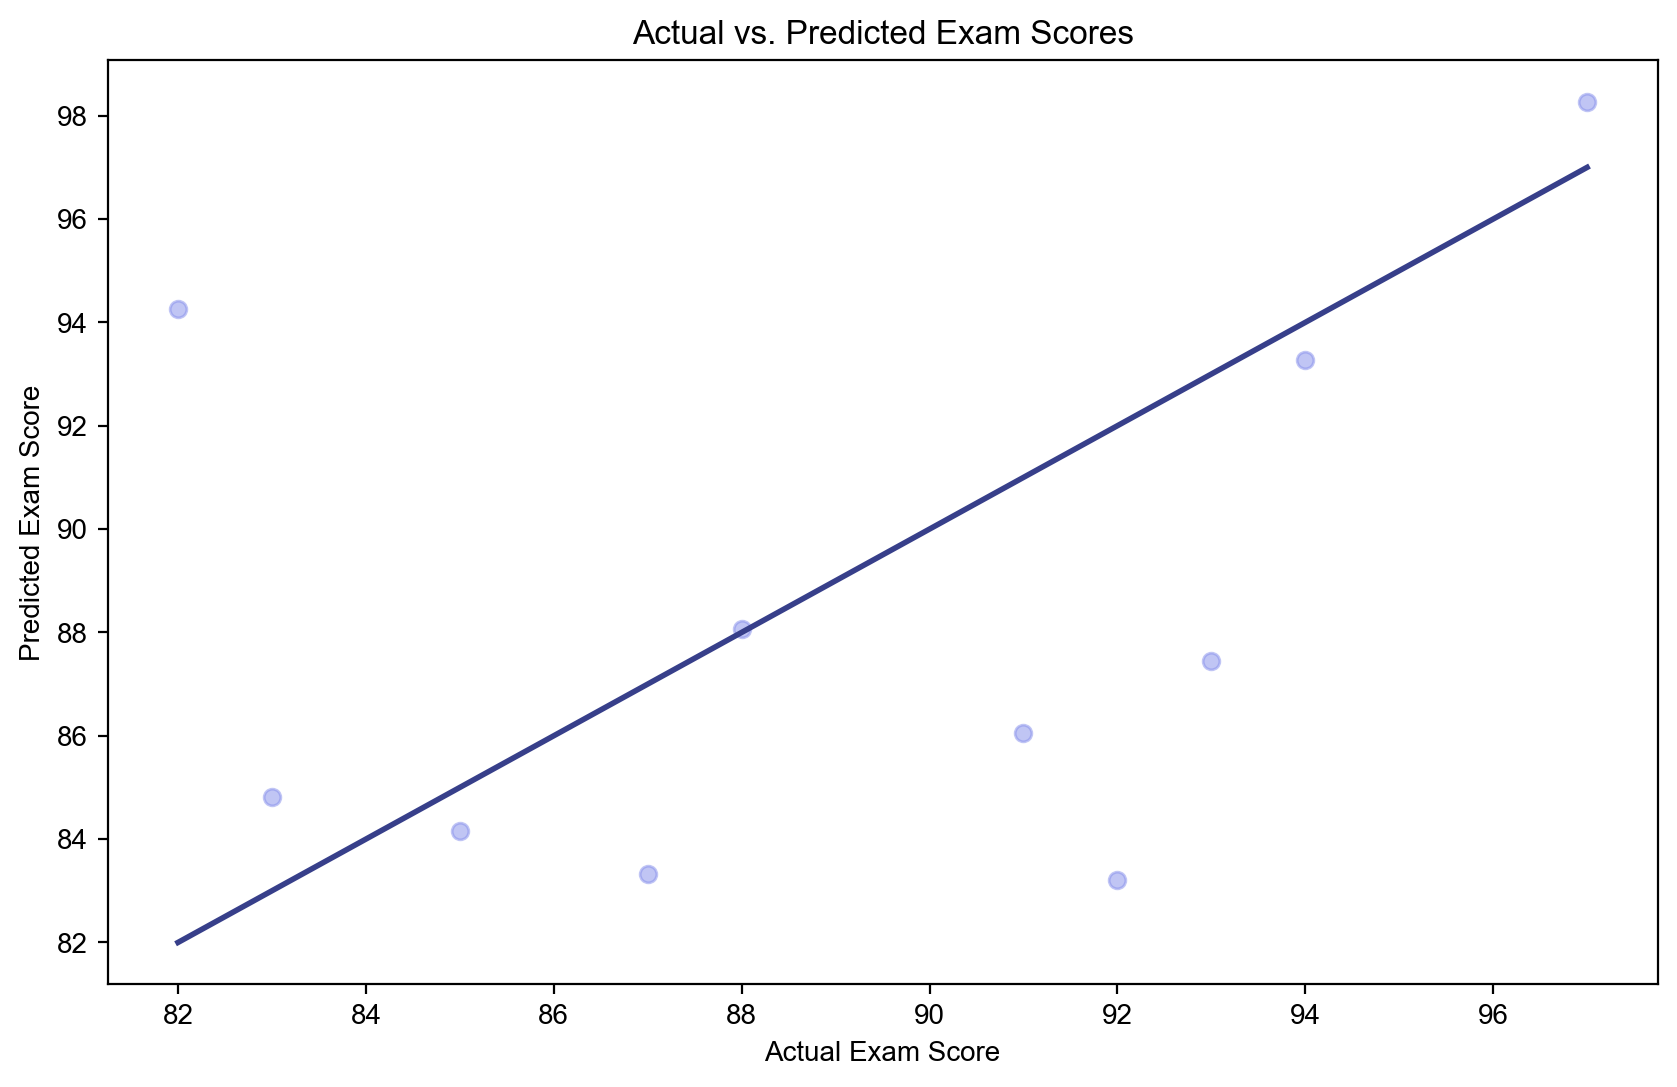

In [350]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_high, y_pred, alpha=0.5, color='#838ceb')  # Scatter plot of actual vs predicted
plt.plot([min(y_test_high), max(y_test_high)], [min(y_test_high), max(y_test_high)], color='#373f8a', lw=2)  # Line of perfect fit
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs. Predicted Exam Scores')
plt.show()